## Install / Import

In [518]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Data Collection

In [519]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "INQ_L": "INQ_L.XPT",       # Total Savings
#     "BMX_L": "BMX_L.XPT",       # BMI
#     "BPXO_L": "BPXO_L.XPT",     # Blood pressure
#     "TCHOL_L": "TCHOL_L.XPT",   # Cholesterol
#     "GLU_L": "GLU_L.XPT",       # Glucose
#     "INS_L": "INS_L.XPT",       # Insulin
#     "HSCRP_L": "HSCRP_L.XPT",   # High-sensitivity C-reactive protein
#     "GHB_L": "GHB_L.XPT",       # Glycohemoglobin
#     "FERTIN_L": "FERTIN_L.XPT", # Ferritin
#     "FOLATE": "FOLATE_L.XPT",    # RBC Folate

#     "DIQ_L": "DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "HEQ_L.XPT",       # Hepatitis B
#     "HSQ_L": "HSQ_L.XPT",       # HIV
#     "KIQ_U_L": "KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "MCQ_L.XPT",       # Disease, ..., etc.
#     "RXQ_RX_L": "RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN', avoiding the column 'WTPH2YR_x'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df_other = df_other.drop(columns=["WTPH2YR"], errors='ignore')
#         df = df.merge(df_other, on="SEQN", how="outer")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     "HOD051",                       # Housing (HOQ_L)
#     "IND310",                       # Total savings (INQ_L)
#     # "OCD150",                     # Occupational (OCQ_L)
#     "BMXBMI", "BMXWAIST",           # BMI (BMX_L)
#     "BPXOSY1", "BPXODI1",           # Blood pressure (BPXO_L)
#     "LBXTC", #"LBXHDL", "LBXLDL",    # Cholesterol (TCHOL_L)
#     "LBXGLU",                       # Glucose (GLU_L)
#     "LBXIN",                       # Insulin (INS_L)
#     "LBXHSCRP",                     # High-sensitivity C-reactive protein (HSCRP_L)
#     "LBXGH",                        # Glycohemoglobin (GHB_L)
#     "LBXFER",                       # Ferritin (FERTIN_L)
#     "LBDRFOSI",                      # RBC Folate (FOLATE)
    
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_BOTH_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_BOTH_RawData.csv'")

## Data Exploration


In [520]:
file = "NHANES_SES_BOTH_RawData.csv"
base_df = pd.read_csv(file)
df = pd.read_csv(file)

In [521]:
df.shape

(11933, 33)

In [522]:
df.head()

SEQN  RIDAGEYR  RIAGENDR  DMDEDUC2  INDFMPIR  HOD051  IND310  BMXBMI  \
0  130378.0      43.0       1.0       5.0      5.00    10.0     1.0    27.0   
1  130379.0      66.0       1.0       5.0      5.00     9.0     1.0    33.5   
2  130380.0      44.0       2.0       3.0      1.41     6.0     1.0    29.7   
3  130381.0       5.0       2.0       4.0      1.53     4.0     1.0    23.8   
4  130382.0       2.0       1.0       4.0      3.60     8.0     1.0    26.4   

   BMXWAIST  BPXOSY1  ...  MCQ160M  MCQ160P  MCQ160L  MCQ550  MCQ220  HSQ590  \
0      98.3    135.0  ...      2.0      2.0      2.0     2.0     2.0     2.0   
1     114.7    121.0  ...      2.0      2.0      2.0     2.0     1.0     1.0   
2      93.5    111.0  ...      1.0      2.0      2.0     2.0     2.0     1.0   
3      70.4    117.0  ...      2.0      2.0      2.0     2.0     2.0     2.0   
4      92.7    117.0  ...      2.0      2.0      2.0     2.0     2.0     2.0   

   LBXHA  HEQ010  KIQ022  RXQ033  
0    1.0     2.0     2.0     1.0  
1    2.0     2.0     2.0     1.0  
2    1.0     2.0     2.0     1.0  
3    1.0     2.0     2.0     1.0  
4    1.0     2.0     2.0     2.0  

[5 rows x 33 columns]

In [523]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'HOD051',
       'IND310', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXODI1', 'LBXTC', 'LBXGLU',
       'LBXIN', 'LBXHSCRP', 'LBXGH', 'LBXFER', 'LBDRFOSI', 'DIQ010', 'MCQ010',
       'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160M', 'MCQ160P', 'MCQ160L',
       'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA', 'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

### Renaming Columns 

In [524]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyPovertyRatio', # Demographics
    'Housing', # Housing
    'TotalSavings', # Total Savings
    # 'Occupation', # Occupational
    'BMI', 'WaistCircumference', # BMI
    'SystolicBP', 'DiastolicBP', # Blood pressure
    'TotalCholesterol', # Cholesterol
    'FastingBloodGlucose', # Glucose
    'InsulinLevel', # Insulin
    'CRP', # High-sensitivity C-reactive protein
    'Glycohemoglobin', # Glycohemoglobin
    'Ferritin', # Ferritin
    'RBCFolate', # RBC Folate

    'Diabetes', # Diabetes
    'Asthma', # Asthma
    'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

# df.head()

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       11933 non-null  float64
 1   Age                        11933 non-null  float64
 2   Gender                     11933 non-null  float64
 3   Education                  11933 non-null  float64
 4   FamilyPovertyRatio         11933 non-null  float64
 5   Housing                    11933 non-null  float64
 6   TotalSavings               11933 non-null  float64
 7   BMI                        11933 non-null  float64
 8   WaistCircumference         11933 non-null  float64
 9   SystolicBP                 11933 non-null  float64
 10  DiastolicBP                11933 non-null  float64
 11  TotalCholesterol           11933 non-null  float64
 12  FastingBloodGlucose        11933 non-null  float64
 13  InsulinLevel               11933 non-null  flo

Checking unique values 

In [526]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_counts = df[column].value_counts()
    print(f"Unique values in column '{column}': {unique_values}")
    print(f"Counts of unique values in column '{column}':\n{unique_counts}\n")

Unique values in column 'SEQN': [130378. 130379. 130380. ... 142308. 142309. 142310.]
Counts of unique values in column 'SEQN':
SEQN
142310.0    1
130378.0    1
130379.0    1
130380.0    1
130381.0    1
           ..
130395.0    1
130394.0    1
130393.0    1
130392.0    1
130391.0    1
Name: count, Length: 11933, dtype: int64

Unique values in column 'Age': [4.30000000e+01 6.60000000e+01 4.40000000e+01 5.00000000e+00
 2.00000000e+00 3.00000000e+00 6.50000000e+01 3.40000000e+01
 6.80000000e+01 2.70000000e+01 5.90000000e+01 3.10000000e+01
 3.30000000e+01 7.40000000e+01 3.90000000e+01 5.10000000e+01
 5.60000000e+01 6.70000000e+01 4.70000000e+01 2.60000000e+01
 1.80000000e+01 1.20000000e+01 7.30000000e+01 8.00000000e+01
 7.70000000e+01 4.00000000e+00 7.00000000e+00 1.60000000e+01
 6.10000000e+01 5.80000000e+01 5.30000000e+01 1.30000000e+01
 1.50000000e+01 1.90000000e+01 1.40000000e+01 1.10000000e+01
 5.40000000e+01 1.70000000e+01 5.00000000e+01 6.30000000e+01
 4.20000000e+01 4.10000000e+01

Feature Distribution

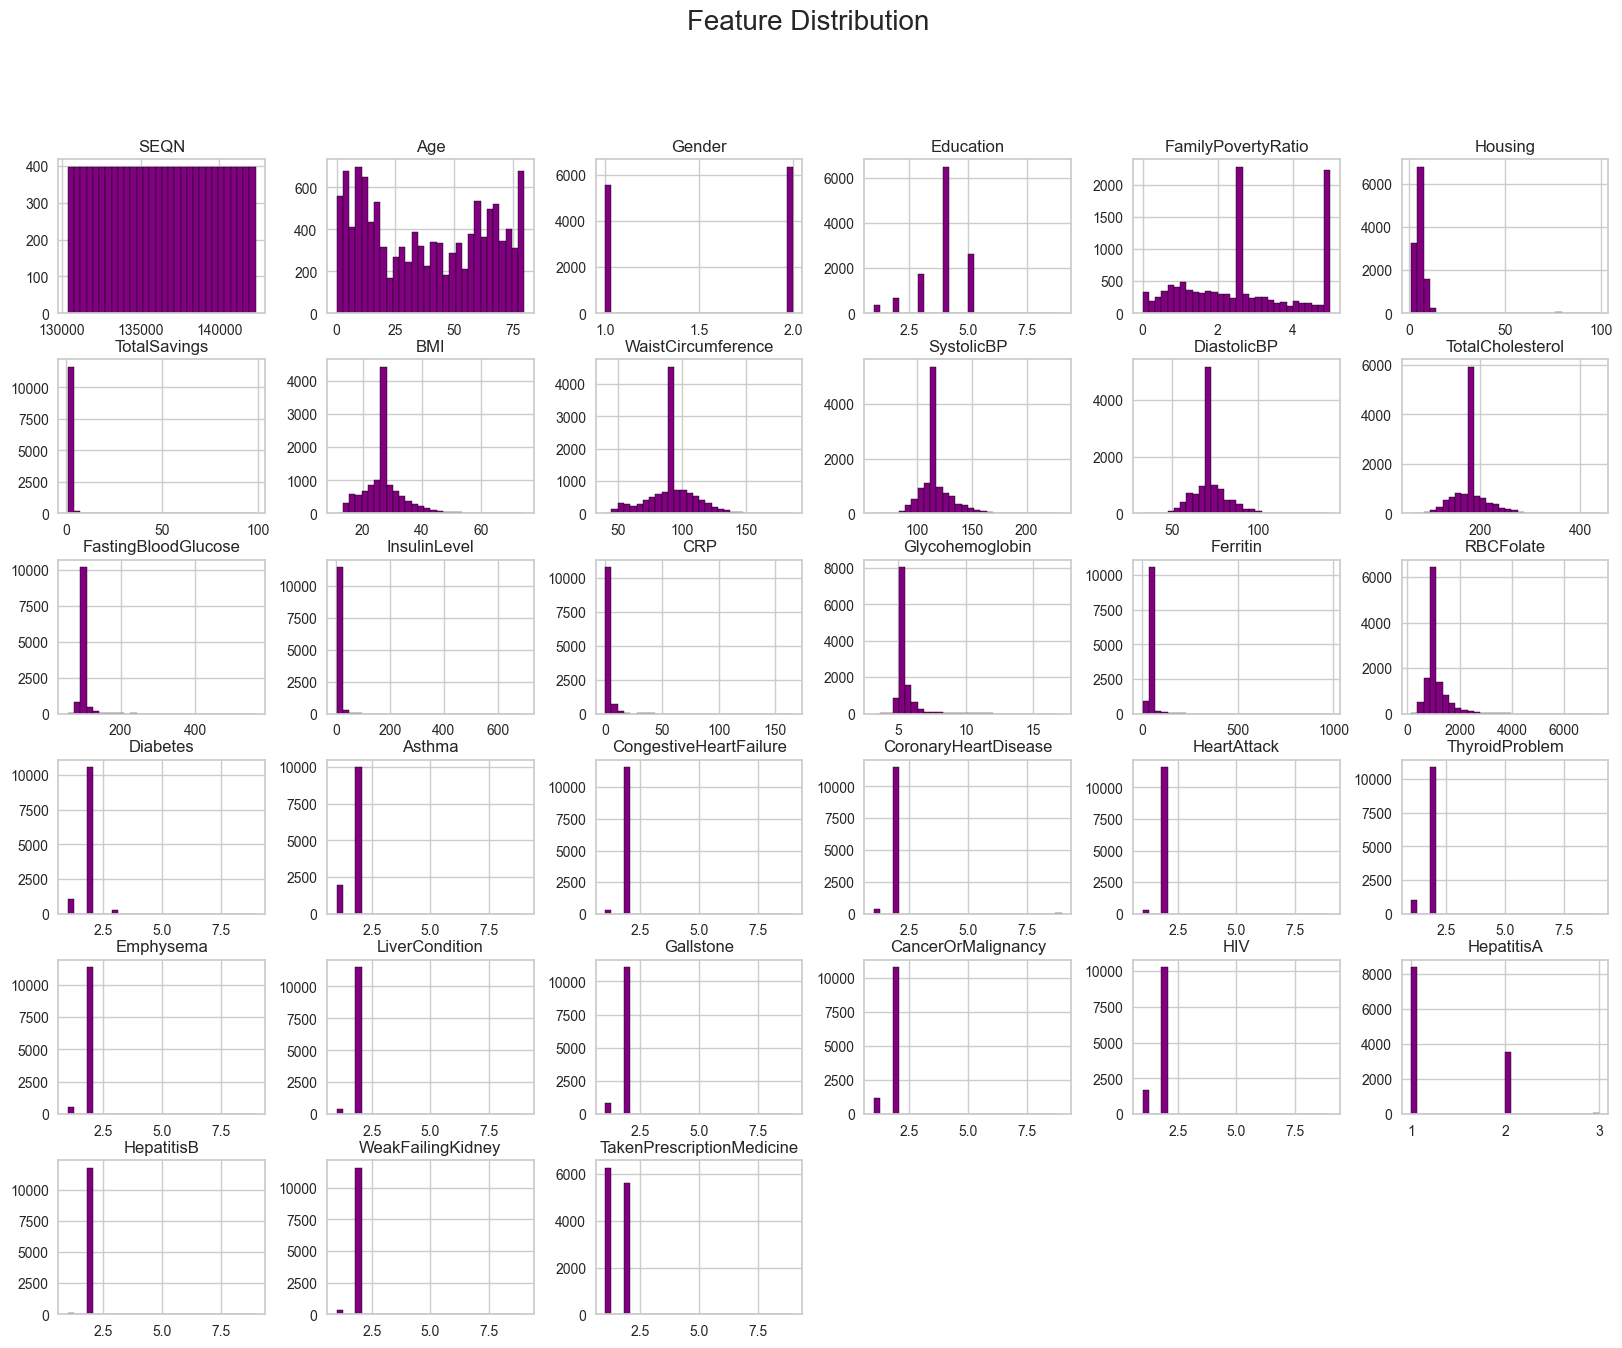

In [527]:
#check featuer distribution
# Plot histograms for feature distribution
df.hist(bins=30, figsize=(20, 15), color='purple', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=20)
plt.show()


Correlation Heatmap

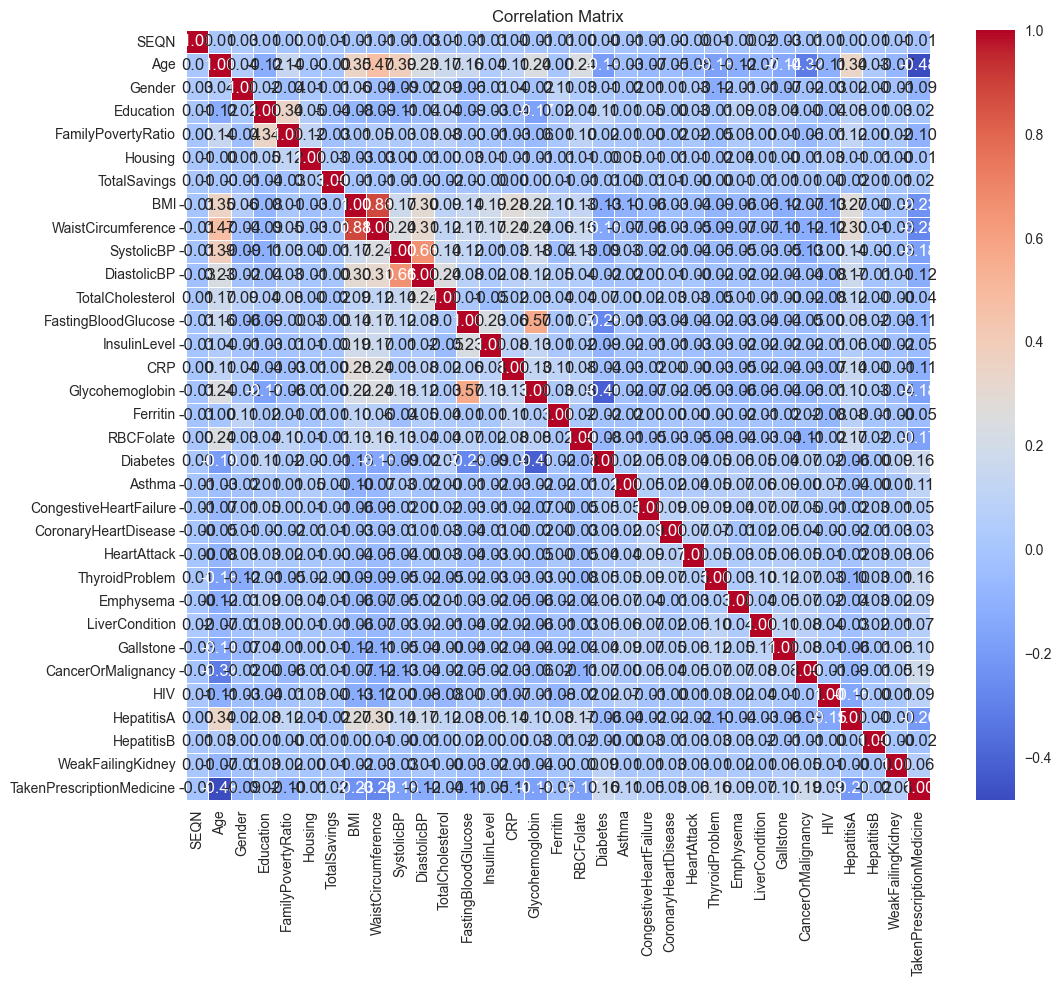

In [528]:
# Compute the correlation matrix
corr = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Data cleaning

Changes the values into 0 and 1 in preparation for feature engineering.
0 = no
1 = yes

In [529]:
df.drop(columns=['SEQN','Gender', 'TotalSavings', 'HepatitisA','HepatitisB', 'TakenPrescriptionMedicine'], inplace=True)

In [530]:
# Drop rows where age is less than 18
df = df[df['Age'] >= 18]

In [531]:
disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
                   'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
                     'WeakFailingKidney']

# disease_columns = ['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack',
#                    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', 'HIV',
#                      'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 'TakenPrescriptionMedicine']

for col in disease_columns:
    mode = df[col].mode()[0]
    df[col] = df[col].replace({3: mode, 7: mode, 9: mode, '.': mode})

# # make the 1 to 0 and 2 to 1 in diseases column

for col in disease_columns:
    df[col] = df[col].replace({2: 0})


In [532]:
nan_values = df.isna().sum()
print(nan_values)

Age                       0
Education                 0
FamilyPovertyRatio        0
Housing                   0
BMI                       0
WaistCircumference        0
SystolicBP                0
DiastolicBP               0
TotalCholesterol          0
FastingBloodGlucose       0
InsulinLevel              0
CRP                       0
Glycohemoglobin           0
Ferritin                  0
RBCFolate                 0
Diabetes                  0
Asthma                    0
CongestiveHeartFailure    0
CoronaryHeartDisease      0
HeartAttack               0
ThyroidProblem            0
Emphysema                 0
LiverCondition            0
Gallstone                 0
CancerOrMalignancy        0
HIV                       0
WeakFailingKidney         0
dtype: int64


Using the column's mean  to replace "don't know" and "missing" values 

In [533]:
df['Housing'] = df['Housing'].replace({77: np.nan, 99: np.nan, '.': np.nan})
df['Housing'].fillna(df['Housing'].mean(), inplace=True)

df['Education'] = df['Education'].replace({7: np.nan, 9: np.nan, '.': np.nan})
df['Education'].fillna(df['Education'].mean(), inplace=True)

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\241280188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Housing'].fillna(df['Housing'].mean(), inplace=True)
C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\241280188.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

### Checking Outliers 

In [534]:
df.shape

(8153, 27)

In [535]:
# from scipy.stats import zscore
# #identify outliers
# z_scores = zscore(df)
# abs_z_scores = np.abs(z_scores)  # taking absolute values
# filtered_entries = (abs_z_scores < 3).all(axis=1)  # keeping only the rows without outliers
# outliers = df[~filtered_entries]  # rows with outliers

# # Graph the outliers
# plt.figure(figsize=(10, 8))
# sns.boxplot(data=outliers, palette="viridis")
# plt.title("Outliers in the Dataset")
# plt.xticks(rotation=90)
# plt.show()

# df = df[filtered_entries]

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1213301728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette="viridis")
C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1213301728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette="viridis")
C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1213301728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette="viridis")
C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1213301728.py:8: FutureWarning: 

Passing `palette` without

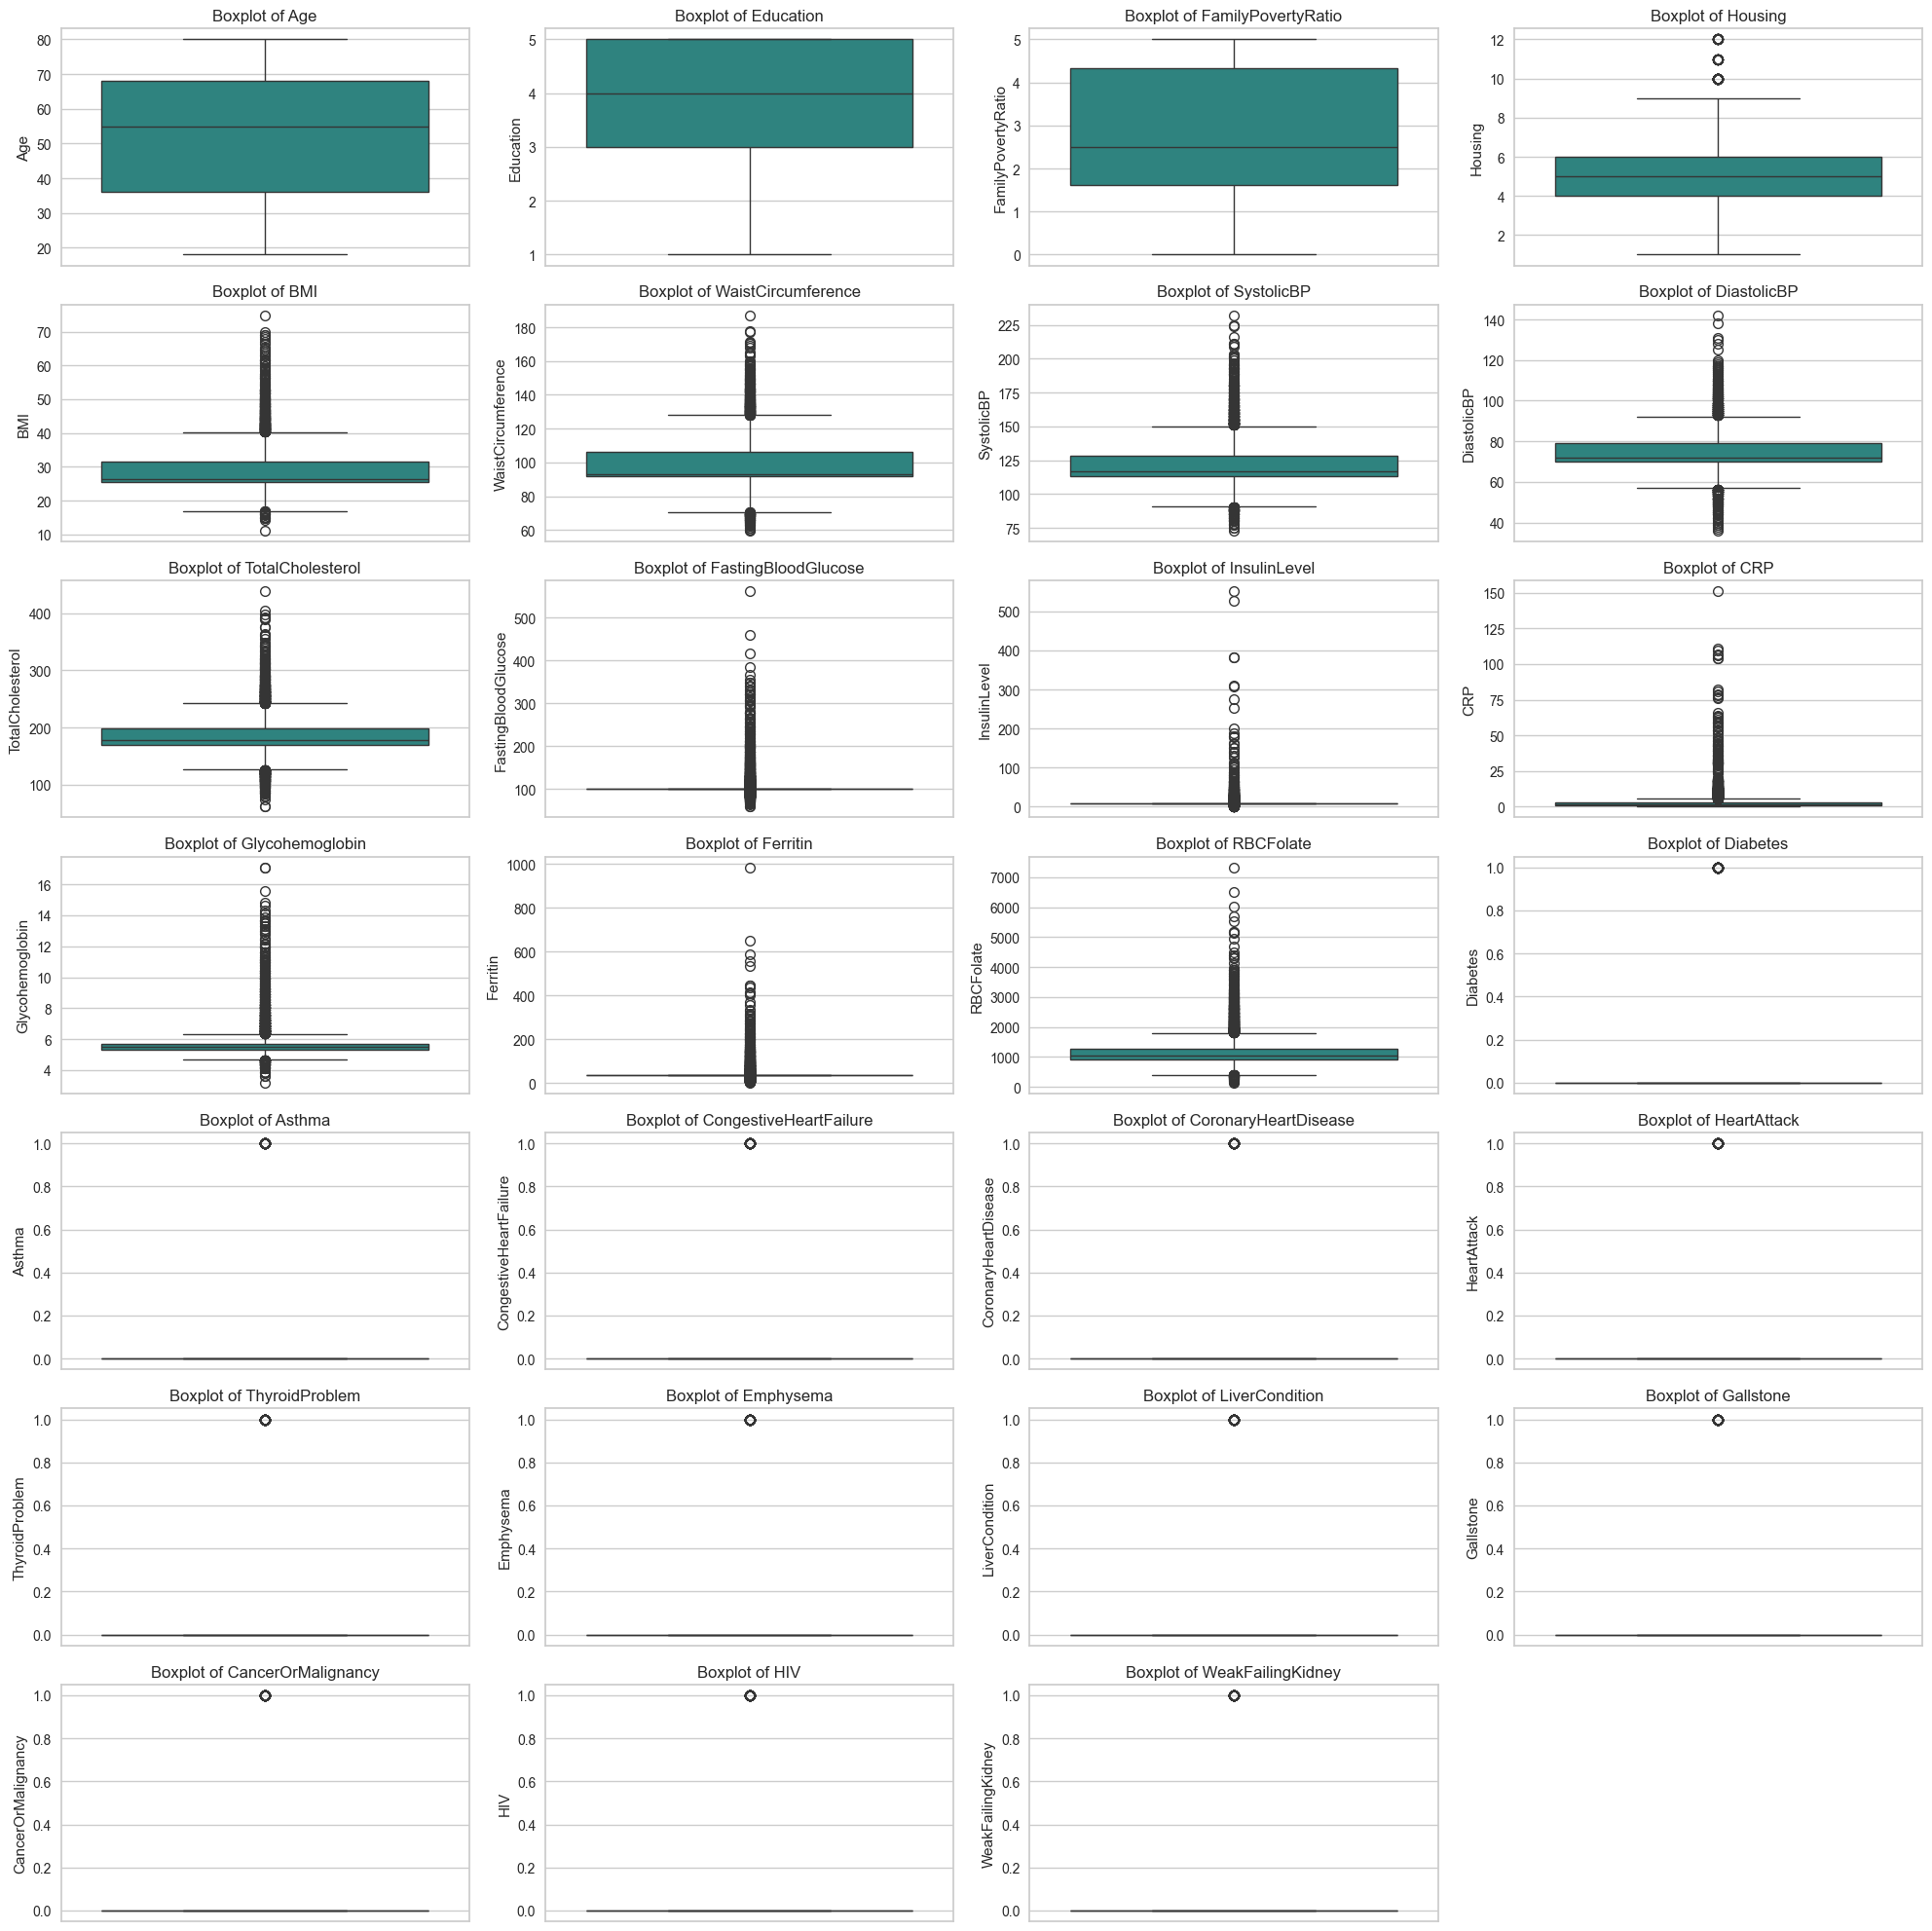

In [536]:
#boxplot for outliers
plt.figure(figsize=(20, 20))
num_columns = len(df.columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(y=df[column], palette="viridis")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()


In [537]:
# from scipy.stats import zscore

# # Identify outliers
# z_scores = zscore(df)
# abs_z_scores = np.abs(z_scores)  # Taking absolute values
# filtered_entries = (abs_z_scores < 3)  # Keeping only the rows without outliers

# # Replace outliers with the mean of the respective column
# for col in df.columns:
#     col_mean = df[col].mean()
#     df.loc[~filtered_entries[col], col] = col_mean

# # Graph the outliers
# plt.figure(figsize=(10, 8))
# sns.boxplot(data=df, palette="viridis")
# plt.title("Data After Replacing Outliers with Mean")
# plt.xticks(rotation=90)
# plt.show()

In [538]:
from scipy.stats import zscore

# Identify outliers
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)  # Taking absolute values
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keeping only the rows without outliers

# Remove outliers
# df_noOutliers = df[filtered_entries]
df = df[filtered_entries]

# Display the shape of the new DataFrame
# print(df_noOutliers.shape)


In [539]:
df.shape

(5866, 27)

## Feature Engineering 

In [540]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'Age': [43. 66. 44. 65. 34. 68. 27. 59. 31. 33. 74. 39. 51. 56. 47. 26. 18. 73.
 67. 58. 19. 80. 63. 42. 41. 77. 38. 57. 30. 70. 24. 69. 53. 28. 64. 55.
 22. 76. 72. 60. 40. 71. 54. 29. 61. 79. 62. 46. 32. 78. 20. 50. 25. 36.
 52. 48. 45. 37. 49. 23. 35. 75. 21.]

Unique values in column 'Education': [5.         3.         2.         4.         1.         3.80655859]

Unique values in column 'FamilyPovertyRatio': [5.00000000e+00 1.41000000e+00 6.30000000e-01 1.33000000e+00
 1.32000000e+00 8.10000000e-01 2.16000000e+00 9.30000000e-01
 3.04000000e+00 4.82000000e+00 1.67000000e+00 9.10000000e-01
 3.36000000e+00 4.42000000e+00 3.22000000e+00 4.37000000e+00
 3.14000000e+00 5.00000000e-02 2.50000000e+00 2.64000000e+00
 3.82000000e+00 1.91000000e+00 8.80000000e-01 2.46000000e+00
 3.43000000e+00 1.03000000e+00 4.22000000e+00 6.50000000e-01
 4.36000000e+00 3.47000000e+00 2.33000000e+00 4.40000000e-01
 1.12000000e+00 1.08000000e+00 1.14000000e+00 2.11000000e+00
 1.2700000

Grouping the morbidity cases into a single column.
This is basically the total number of disease each participant has at the time of NHANSE questioning.

In [541]:

# Sum all disease-related columns to create a health score
df['MorbidityScore'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                            'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                            'CancerOrMalignancy', 'HIV',  'WeakFailingKidney']].sum(axis=1)

# df['MorbidityScore'] = df[['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
#                             'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
#                             'CancerOrMalignancy', 'HIV', 'HepatitisA', 'HepatitisB', 'WeakFailingKidney', 
#                             'TakenPrescriptionMedicine']].sum(axis=1)

# Drop individual disease columns to avoid redundancy
df = df.drop(columns=['Diabetes', 'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 
                      'HeartAttack', 'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 
                      'CancerOrMalignancy', 'HIV','WeakFailingKidney'])


In [542]:
#Creating a new column called SES_Score which is the sum of the SES columns

df["SES_Score"] = df[["Education", "FamilyPovertyRatio","Housing"]].sum(axis=1)

df.drop(columns=["Education", "FamilyPovertyRatio", "Housing"], inplace=True)

In [543]:
def classify_bp(SystolicBP, DiastolicBP):
    if SystolicBP < 120 and DiastolicBP < 80:
        return 0 #normal
    elif 120 <= SystolicBP < 130 and DiastolicBP < 80:
        return 1 #elevated
    elif 130 <= SystolicBP < 140 or 80 <= DiastolicBP < 90:
        return 2 #hypertension stage 1
    elif SystolicBP >= 140 or DiastolicBP >= 90:
        return 3 #hypertension stage 2
    else:
        return 4 if SystolicBP >= 180 or DiastolicBP >= 120 else "nan" #hypertensive crisis
    

df['BloodPressure'] = df.apply(lambda x: classify_bp(x['SystolicBP'], x['DiastolicBP']), axis=1)
df = df.drop(columns=['SystolicBP', 'DiastolicBP']) # Drop the original blood pressure columns


In [544]:
df["BloodPressure"].value_counts()

BloodPressure
0    3593
2    1260
1     595
3     418
Name: count, dtype: int64

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 11930
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5866 non-null   float64
 1   BMI                  5866 non-null   float64
 2   WaistCircumference   5866 non-null   float64
 3   TotalCholesterol     5866 non-null   float64
 4   FastingBloodGlucose  5866 non-null   float64
 5   InsulinLevel         5866 non-null   float64
 6   CRP                  5866 non-null   float64
 7   Glycohemoglobin      5866 non-null   float64
 8   Ferritin             5866 non-null   float64
 9   RBCFolate            5866 non-null   float64
 10  MorbidityScore       5866 non-null   float64
 11  SES_Score            5866 non-null   float64
 12  BloodPressure        5866 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 641.6 KB


## dataset profile after processing

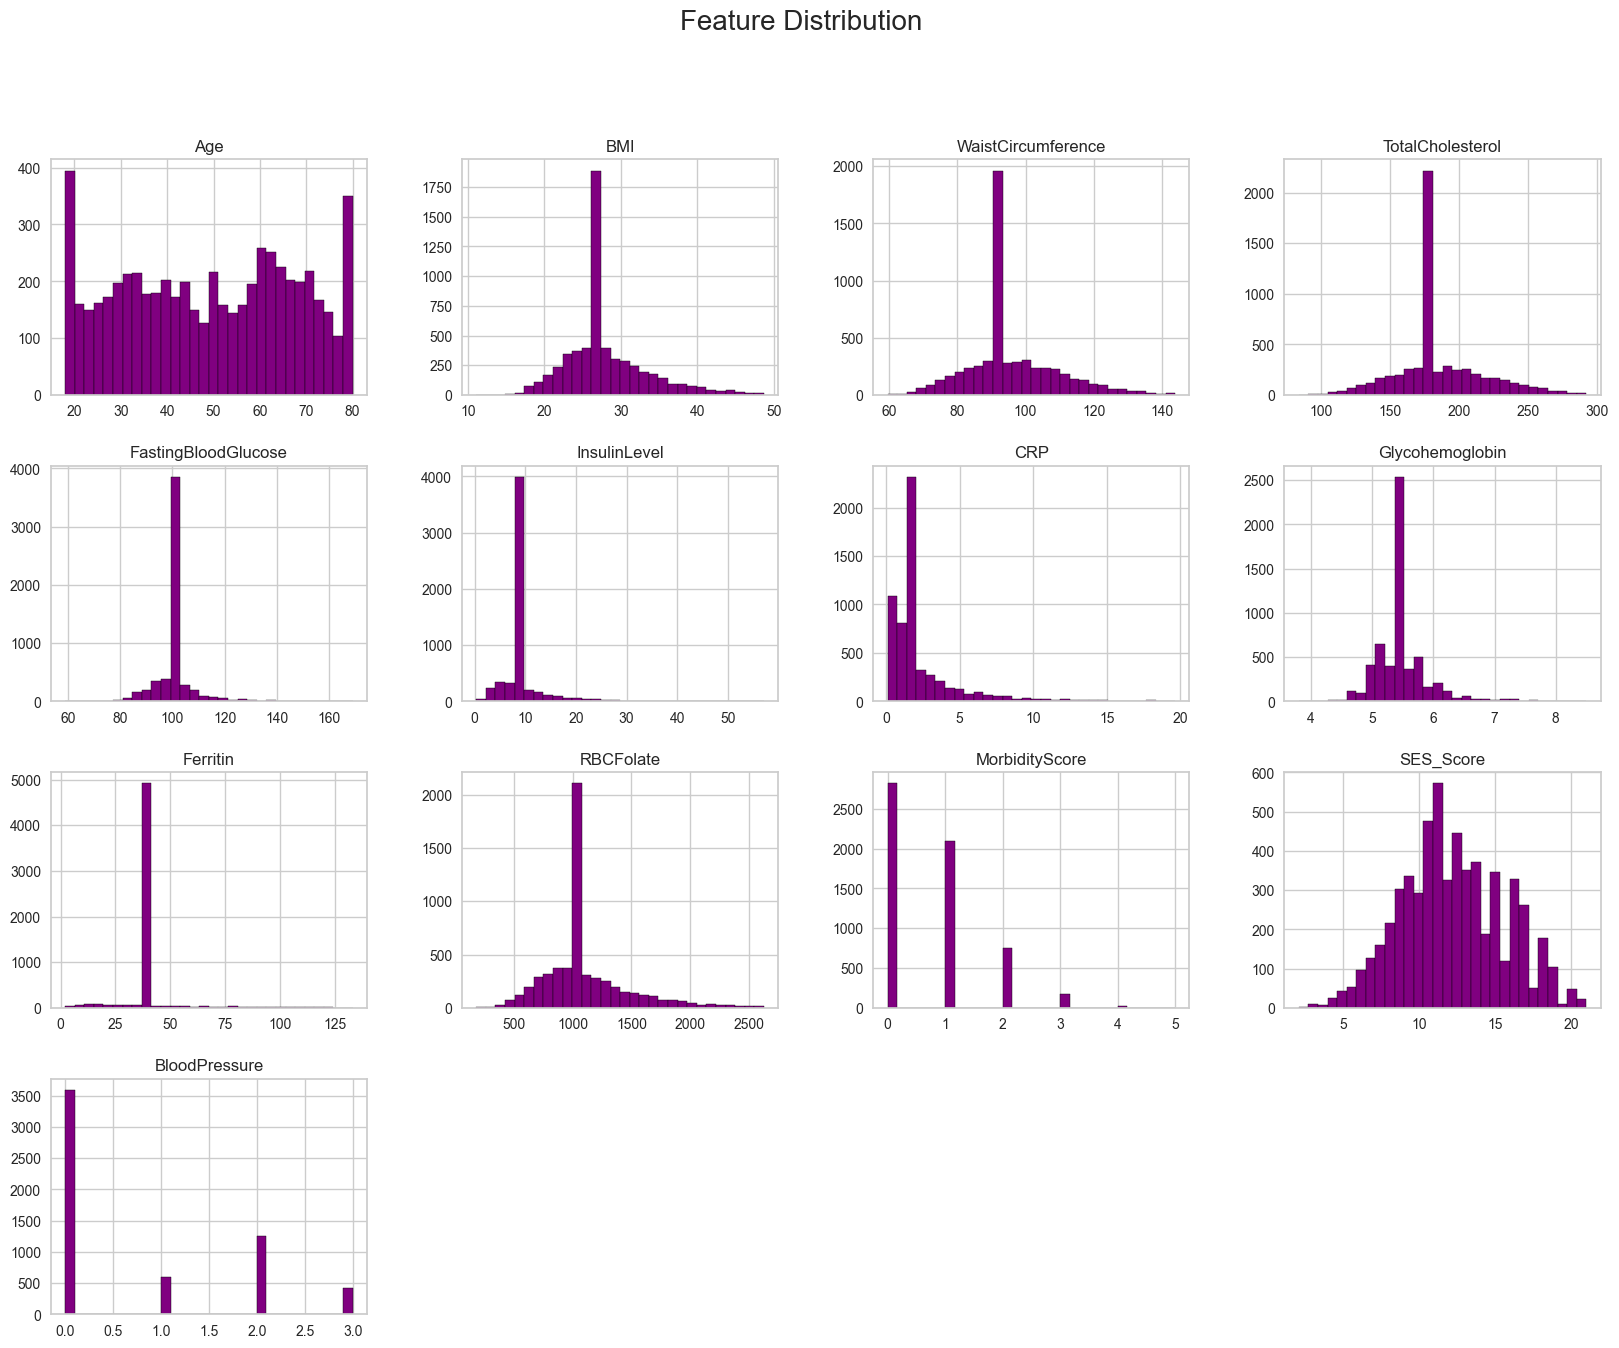

In [546]:
#check featuer distribution
# Plot histograms for feature distribution
df.hist(bins=30, figsize=(20, 15), color='purple', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=20)
plt.show()

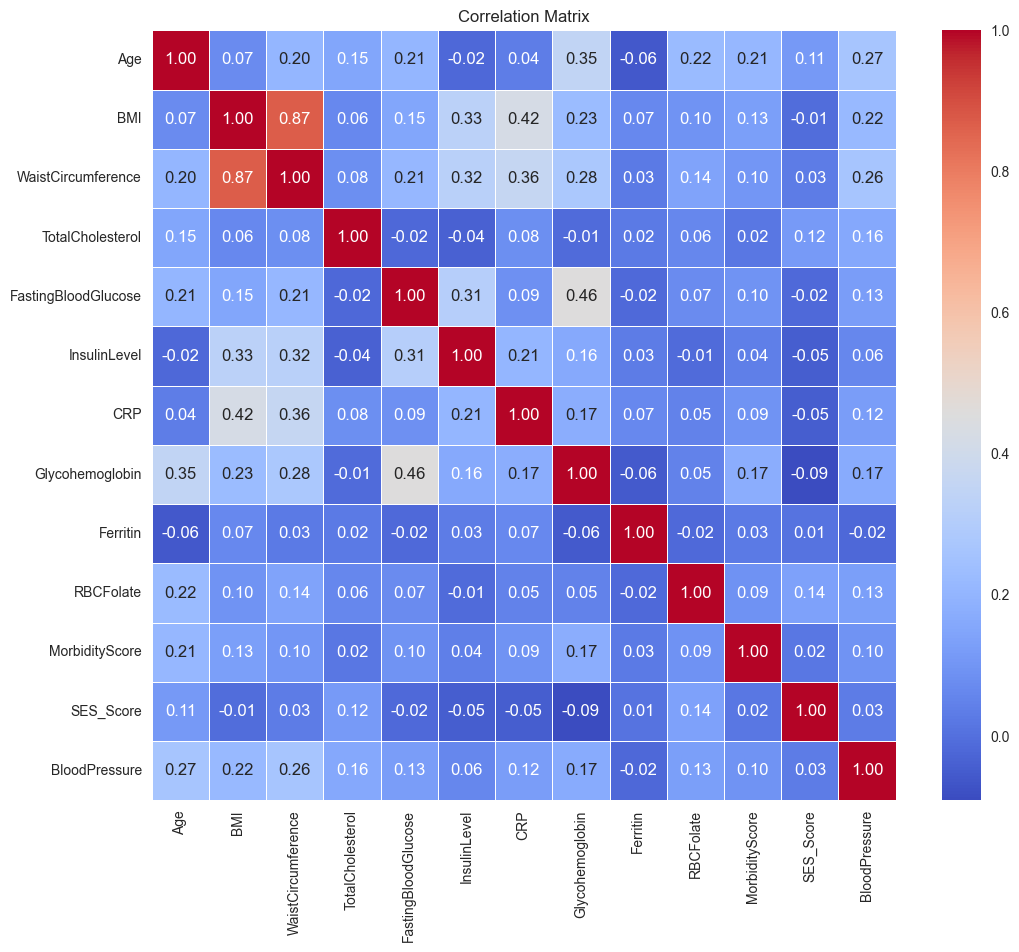

In [547]:
# Compute the correlation matrix
corr = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [548]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 0 to 11930
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5866 non-null   float64
 1   BMI                  5866 non-null   float64
 2   WaistCircumference   5866 non-null   float64
 3   TotalCholesterol     5866 non-null   float64
 4   FastingBloodGlucose  5866 non-null   float64
 5   InsulinLevel         5866 non-null   float64
 6   CRP                  5866 non-null   float64
 7   Glycohemoglobin      5866 non-null   float64
 8   Ferritin             5866 non-null   float64
 9   RBCFolate            5866 non-null   float64
 10  MorbidityScore       5866 non-null   float64
 11  SES_Score            5866 non-null   float64
 12  BloodPressure        5866 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 641.6 KB


In [549]:
##show unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    unique_counts = df[column].value_counts()
    print(f"Unique values in column '{column}': {unique_values}")
    # print(f"Counts of unique values in column '{column}':\n{unique_counts}\n")

Unique values in column 'Age': [43. 66. 44. 65. 34. 68. 27. 59. 31. 33. 74. 39. 51. 56. 47. 26. 18. 73.
 67. 58. 19. 80. 63. 42. 41. 77. 38. 57. 30. 70. 24. 69. 53. 28. 64. 55.
 22. 76. 72. 60. 40. 71. 54. 29. 61. 79. 62. 46. 32. 78. 20. 50. 25. 36.
 52. 48. 45. 37. 49. 23. 35. 75. 21.]
Unique values in column 'BMI': [27.  33.5 29.7 26.4 30.2 42.6 43.7 28.  46.  38.9 43.  46.1 24.4 27.3
 28.7 22.7 28.6 28.3 25.7 25.1 28.1 26.5 36.1 32.9 30.1 26.8 38.4 27.2
 22.2 24.8 30.7 24.9 34.6 34.5 22.  23.  24.7 21.4 22.6 20.7 33.2 16.7
 37.3 41.  29.6 32.2 32.4 30.6 25.3 22.9 24.2 19.9 27.4 22.1 31.  25.2
 19.8 23.7 33.6 27.1 28.2 24.5 35.2 33.4 36.9 27.7 21.8 32.1 29.2 31.6
 36.2 27.6 24.1 23.6 29.4 30.  19.7 20.1 30.4 31.8 29.  19.1 23.3 33.3
 41.5 21.9 26.9 34.3 25.5 38.1 18.6 24.6 21.5 25.9 40.4 20.  23.5 29.8
 26.  18.2 29.3 21.  24.3 21.1 36.8 42.7 20.5 30.3 18.4 21.6 28.5 47.3
 28.8 33.7 26.6 23.8 34.2 20.3 38.2 22.3 31.4 37.  22.8 25.4 38.7 37.4
 32.  35.4 23.2 31.3 27.5 27.8 17.9 20.4 2

## Scaling the Dataset

In [550]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

# tried both of them but the result is the same

df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [551]:
df_scaled.head(10)

Age       BMI  WaistCircumference  TotalCholesterol  \
0 -0.320469 -0.181334            0.167929          2.476558   
1  0.913499  1.028841            1.417608          0.903584   
2 -0.266818  0.321354           -0.197830          0.054177   
3 -0.320469 -0.293043           -0.258790         -0.228958   
4  0.859849 -0.293043           -0.258790         -0.228958   
5 -0.803326  0.414444            0.762289         -0.071661   
6  1.020801  2.723087            1.973868          0.557529   
7 -1.178881  2.927886            1.707168         -0.228958   
8  0.537944  0.004847            0.198409         -0.228958   
9 -0.964278  3.356102            2.659667         -0.826689   

   FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  Ferritin  \
0             1.472943      1.073223 -0.208103         0.206020 -0.094609   
1            -0.182216      1.947322 -0.113220         0.206020 -0.094609   
2             6.556645      1.232876  1.249295         1.517481 -1.946888   
3            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
4            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
5            -0.063990      0.245024 -0.485160        -0.886865 -0.094609   
6            -0.063990     -0.104217  0.619274         0.861751 -0.094609   
7            -0.063990     -0.104217 -0.333348        -1.324019 -0.094609   
8            -0.063990     -0.104217 -0.333348        -0.012557 -0.094609   
9            -0.063990     -0.104217  3.367076         0.861751  0.962766   

   RBCFolate  MorbidityScore  SES_Score  BloodPressure  
0  -1.132581       -0.864360   2.317142       1.226577  
1  -0.489904        1.528436   2.019738       1.226577  
2  -0.771588        2.724834  -0.534960      -0.727817  
3  -0.169933       -0.864360  -1.956549      -0.727817  
4  -0.169933        0.332038   1.127527      -0.727817  
5   1.033378        0.332038  -1.153559      -0.727817  
6  -0.856367        0.332038   0.330485       2.203773  
7  -0.875510       -0.864360  -0.415998       1.226577  
8  -0.659461       -0.864360   0.235316       2.203773  
9   1.115422       -0.864360  -0.311907      -0.727817

## Dimensionality Reduction

### PCA

### 2D

In [552]:
pca_2D = PCA(n_components=2)
pca_2D.fit(df_scaled)

PCA_2D = pd.DataFrame(pca_2D.transform(df_scaled), columns=(["col1","col2"]))
PCA_2D.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5866.0  4.602902e-17  1.701249 -4.551447 -1.025035 -0.390902  0.929204   
col2  5866.0 -2.664838e-17  1.240151 -6.183974 -0.764334  0.001718  0.790546   

           max  
col1  7.595357  
col2  4.647522

In [553]:

explained_variance = pca_2D.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)



Explained variance of PC1 0.22259659617024216
Explained variance of PC2 0.1182855129353221


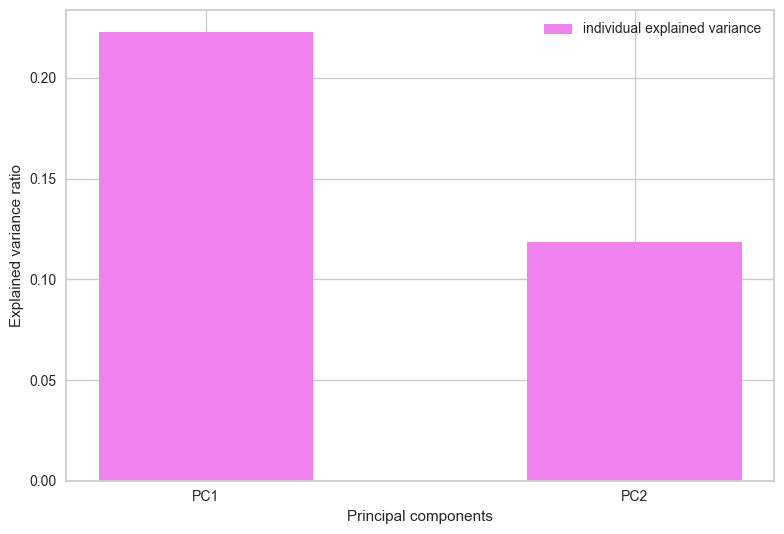

In [554]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


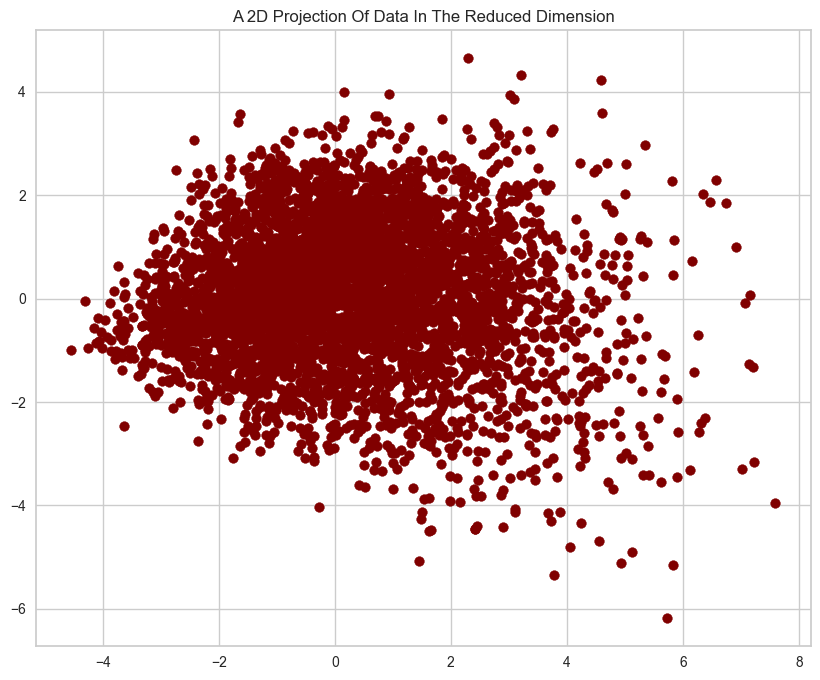

In [555]:
# A 2D Projection Of Data In The Reduced Dimension
x = PCA_2D["col1"]
y = PCA_2D["col2"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()



### 3D


In [556]:
pca_3D = PCA(n_components=3)
pca_3D.fit(df_scaled)

PCA_3D = pd.DataFrame(pca_3D.transform(df_scaled), columns=(["col1","col2", "col3"]))
PCA_3D.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5866.0  4.602902e-17  1.701249 -4.551447 -1.025035 -0.390902  0.929204   
col2  5866.0 -2.664838e-17  1.240151 -6.183974 -0.764334  0.001718  0.790546   
col3  5866.0  3.633870e-18  1.166321 -5.147319 -0.673991  0.105957  0.612928   

           max  
col1  7.595357  
col2  4.647522  
col3  8.277304

In [557]:

explained_variance = pca_3D.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC3", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC3", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

loadings = pca_3D.components_.T * np.sqrt(pca_3D.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.columns)
loading_matrix


Explained variance of PC3 0.22259659617024216
Explained variance of PC3 0.1182855129353221
Explained variance of PC3 0.10462099827603402


PC1       PC2       PC3
Age                  0.415715  0.665902  0.051715
BMI                  0.787535 -0.377864 -0.261050
WaistCircumference   0.826321 -0.245584 -0.232398
TotalCholesterol     0.148640  0.276420 -0.474361
FastingBloodGlucose  0.487515  0.153718  0.563503
InsulinLevel         0.473043 -0.376320  0.238882
CRP                  0.524299 -0.316114 -0.185656
Glycohemoglobin      0.567504  0.242787  0.513045
Ferritin             0.029314 -0.214310 -0.207948
RBCFolate            0.241985  0.406416 -0.260665
MorbidityScore       0.292810  0.279716  0.074559
SES_Score            0.014024  0.326858 -0.432360
BloodPressure        0.438837  0.307812 -0.185713

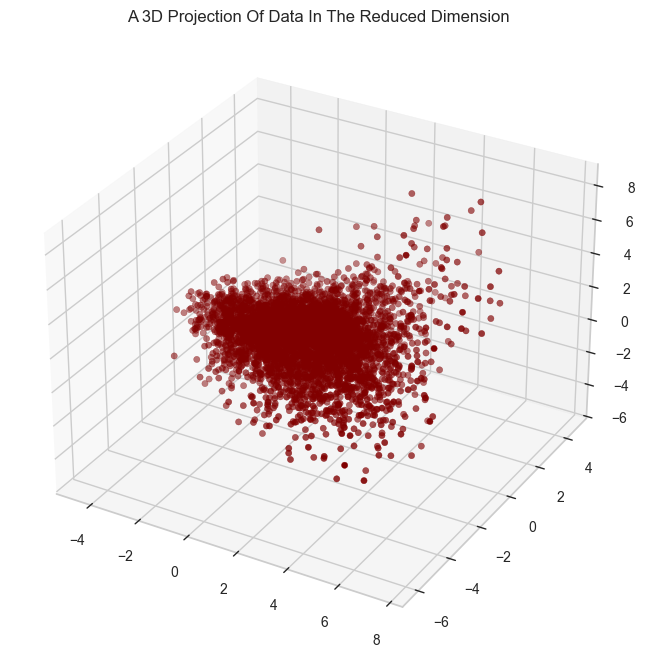

In [558]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_3D["col1"]
y =PCA_3D["col2"]
z =PCA_3D["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Other reduction method 

## K-Means

In [559]:
kmeans_df = df.copy()
kmeans_df_scaled = df_scaled.copy()
kmeans_pca2D = PCA_2D.copy()
kmeans_pca3D = PCA_3D.copy()

### Without PCA

#### Scaled

In [560]:
withouPCA_scaled_kmeans_df = df.copy()
withouPCA_scaled_kmeans_df_scaled = df_scaled.copy()

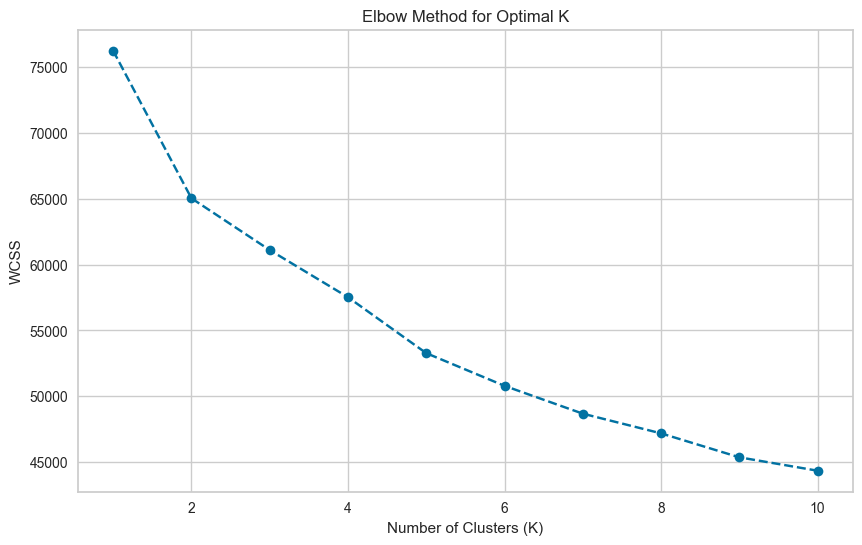

In [561]:
# Elbow Method for KMeans
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(withouPCA_scaled_kmeans_df_scaled)  # Use the scaled data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\952949666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=withouPCA_scaled_kmeans_df_scaled['Cluster'], palette='viridis')


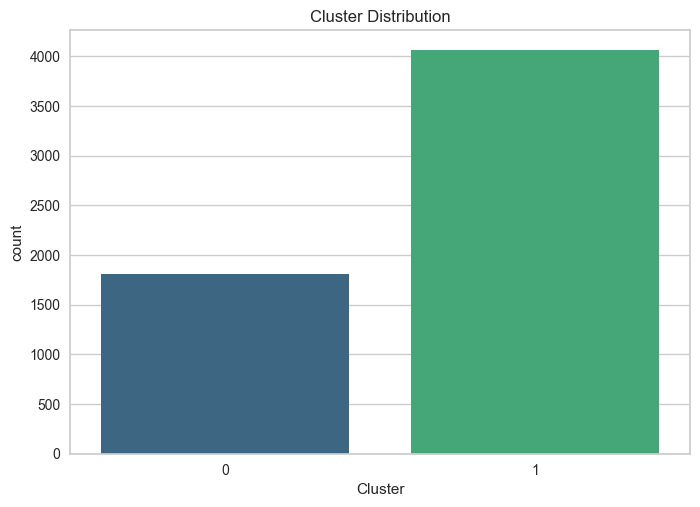

In [562]:
# Fit the KMeans model to the scaled data
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust clusters as needed
withouPCA_scaled_kmeans_df_scaled['Cluster'] = kmeans.fit_predict(withouPCA_scaled_kmeans_df_scaled)

# Visualize Cluster Distribution
sns.countplot(x=withouPCA_scaled_kmeans_df_scaled['Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.show()

In [563]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withouPCA_scaled_kmeans_df_scaled.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age       BMI  WaistCircumference  TotalCholesterol  \
Cluster                                                             
0        0.410739  1.005873            1.048060          0.166132   
1       -0.182708 -0.447440           -0.466206         -0.073900   

         FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Cluster                                                                 
0                   0.478892      0.495421  0.664206         0.599240   
1                  -0.213024     -0.220377 -0.295457        -0.266559   

         Ferritin  RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Cluster                                                                 
0        0.034340   0.352928        0.312827   0.037908       0.701185  
1       -0.015275  -0.156992       -0.139154  -0.016863      -0.311906

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


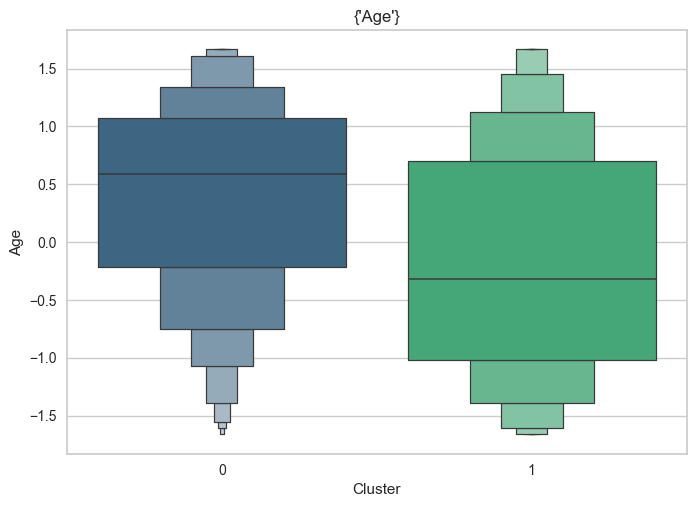

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


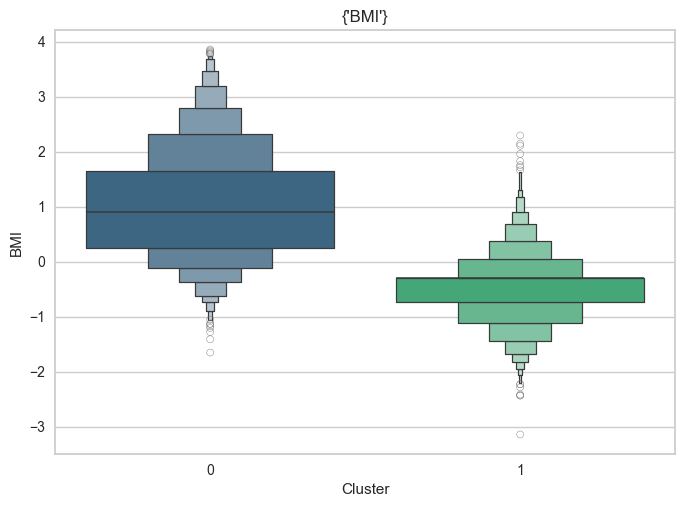

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


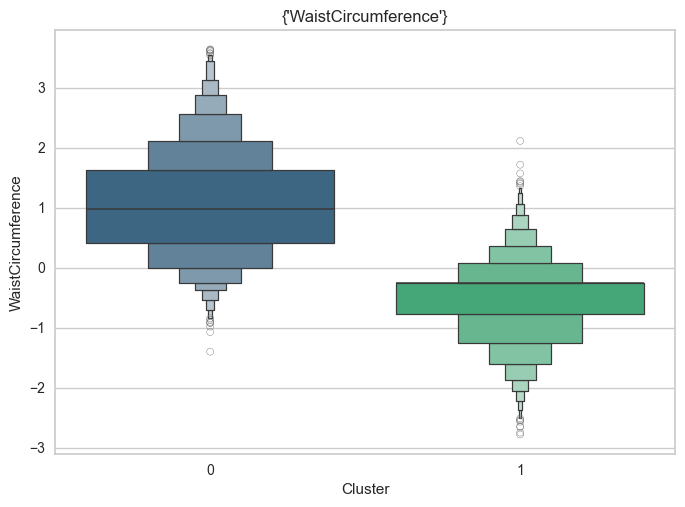

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


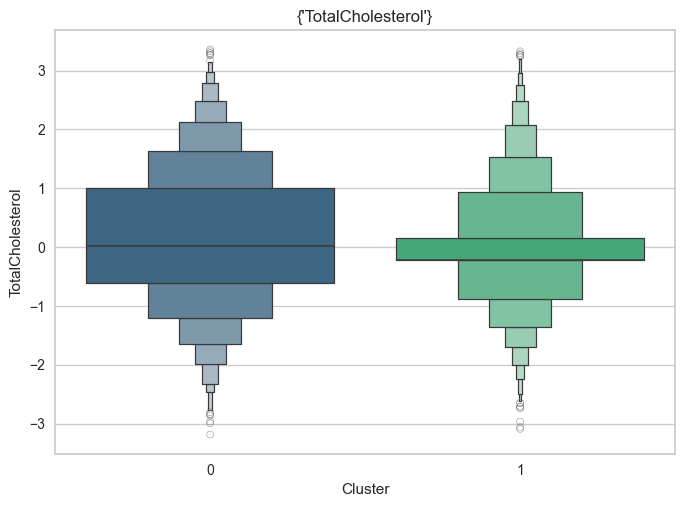

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


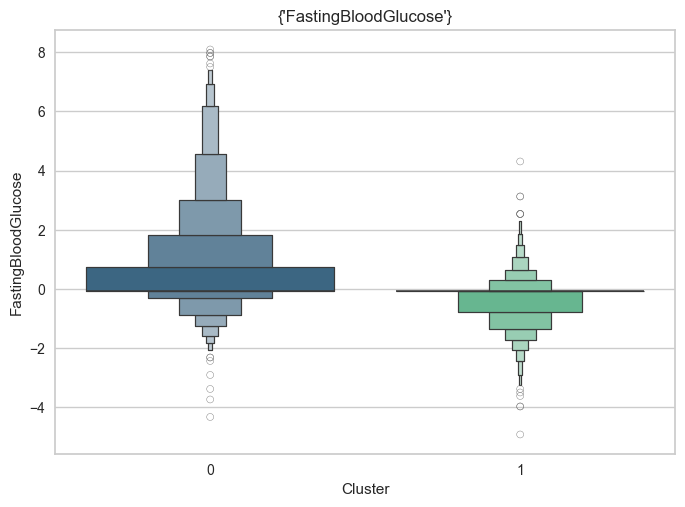

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


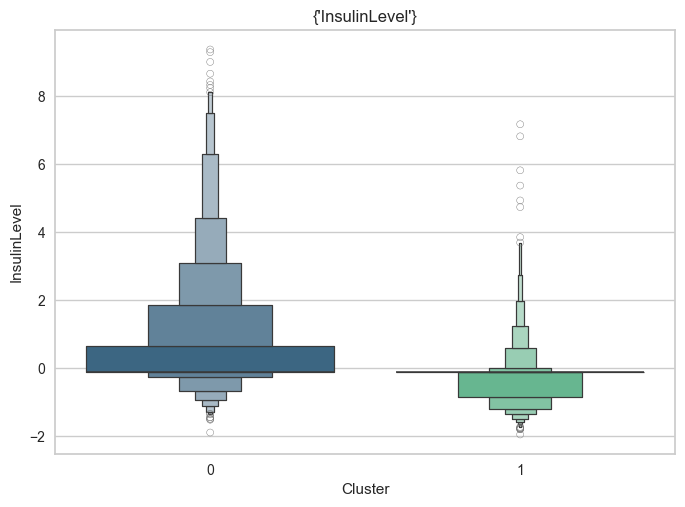

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


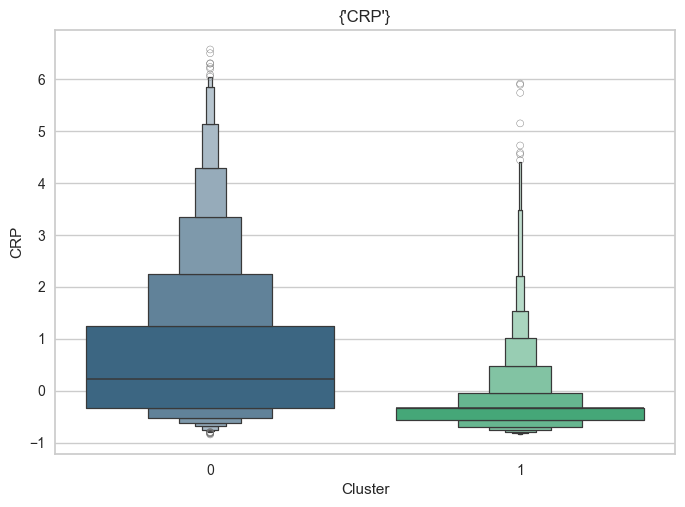

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


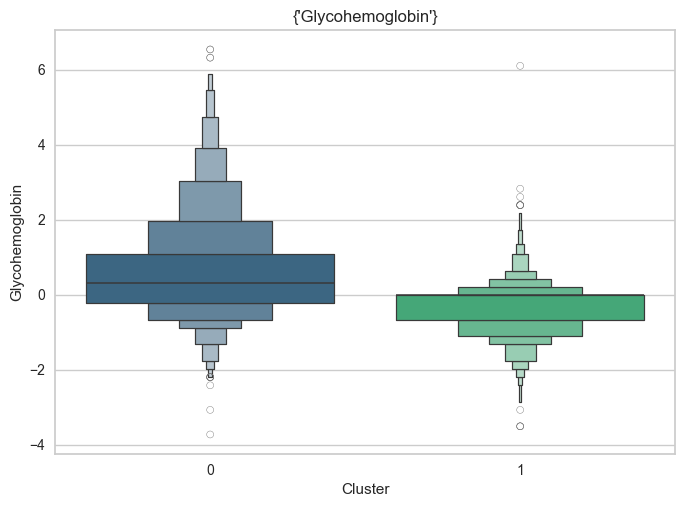

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


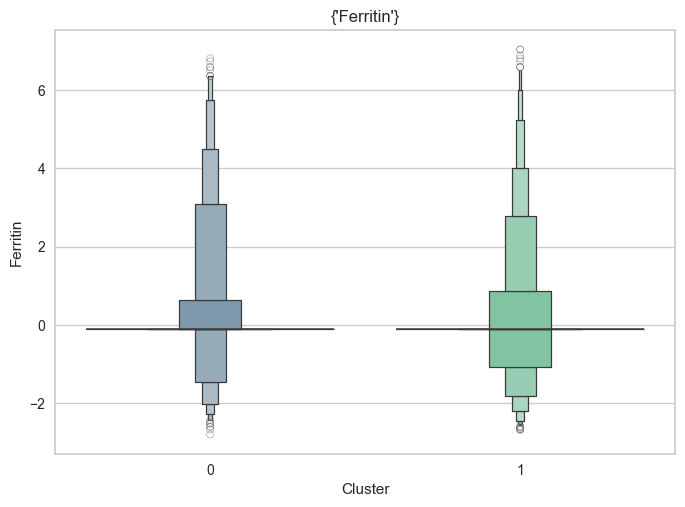

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


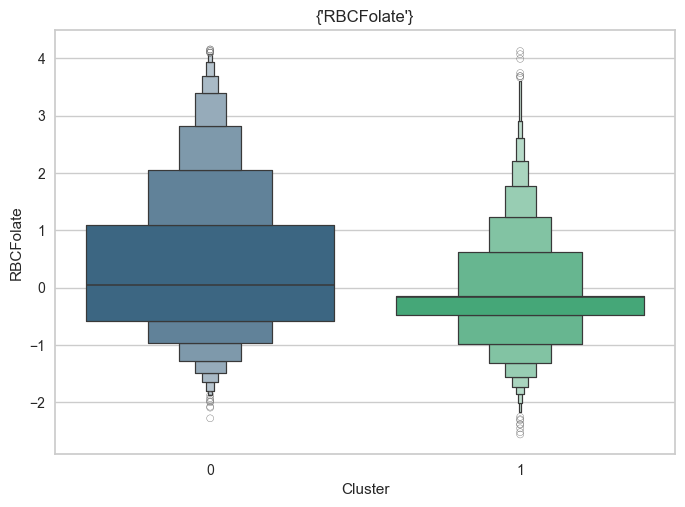

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


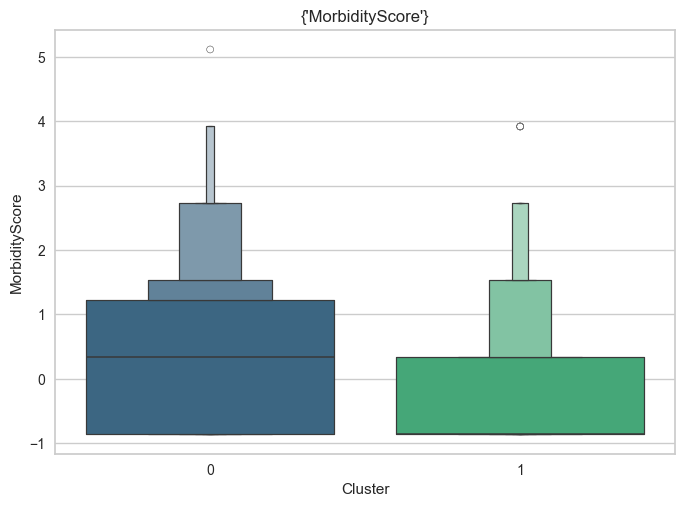

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


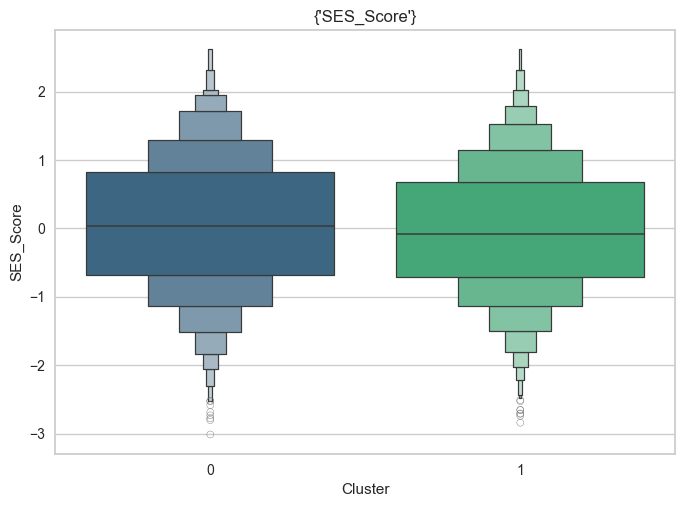

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


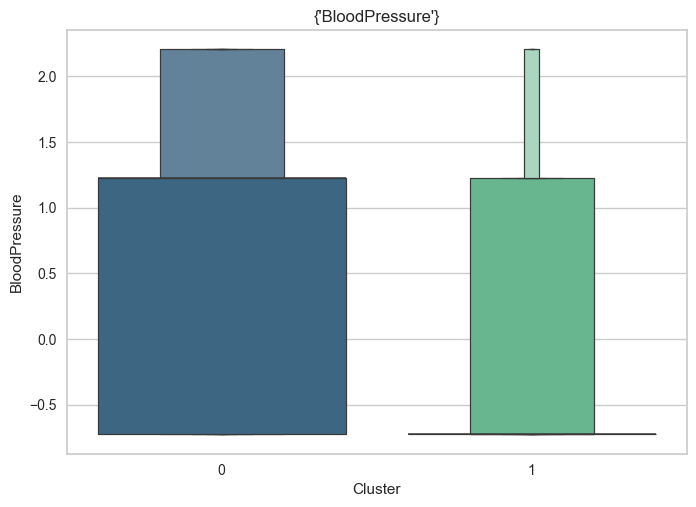

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2818930334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")


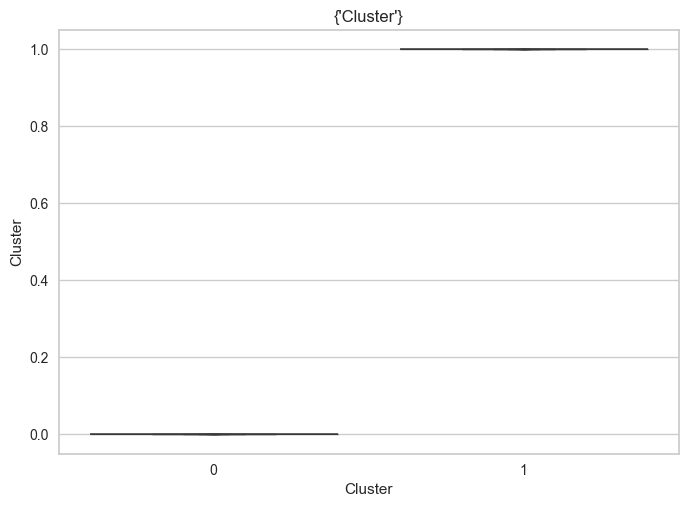

In [564]:
for col in withouPCA_scaled_kmeans_df_scaled.columns:

  plt.figure()
  pl=sns.boxenplot(y=withouPCA_scaled_kmeans_df_scaled[col],x=withouPCA_scaled_kmeans_df_scaled["Cluster"], palette= "viridis")
  pl.set_title({col})
  plt.show()

#### Not Scaled

In [506]:
withouPCA_Notscaled_kmeans_df = df.copy()
withouPCA_Notscaled_kmeans_df_scaled = df_scaled.copy()

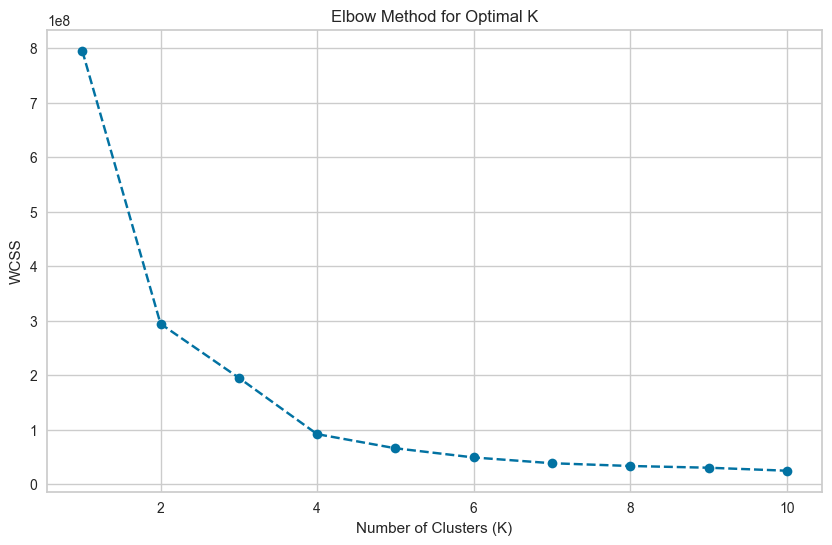

In [507]:
# Elbow Method for KMeans
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(withouPCA_Notscaled_kmeans_df)  # Use the scaled data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\140089177.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=withouPCA_Notscaled_kmeans_df['Cluster'], palette='viridis')


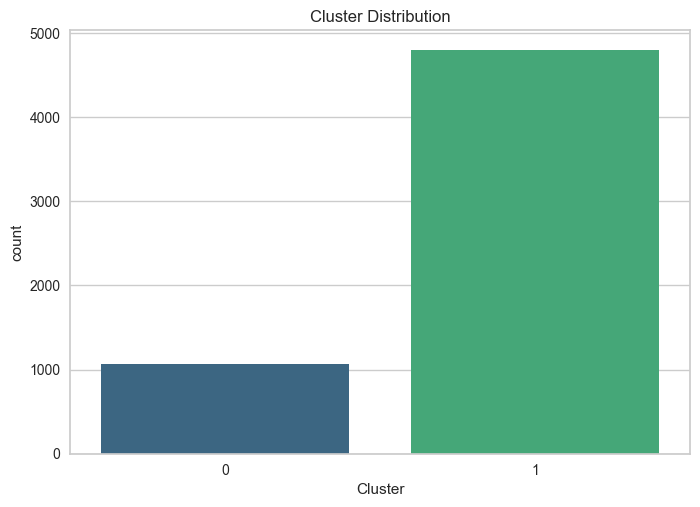

In [508]:
# Fit the KMeans model to the scaled data
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust clusters as needed
withouPCA_Notscaled_kmeans_df['Cluster'] = kmeans.fit_predict(withouPCA_Notscaled_kmeans_df)

# Visualize Cluster Distribution
sns.countplot(x=withouPCA_Notscaled_kmeans_df['Cluster'], palette='viridis')
plt.title('Cluster Distribution')
plt.show()

In [509]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withouPCA_Notscaled_kmeans_df.groupby('Cluster').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age        BMI  WaistCircumference  TotalCholesterol  \
Cluster                                                               
0        56.249300  29.032586           99.317927        191.205415   
1        47.348071  27.737518           95.376601        183.953910   

         FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Cluster                                                                 
0                 101.393091     10.001186  2.757908         5.534174   
1                 100.350991     10.185950  2.232363         5.499395   

          Ferritin    RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Cluster                                                                    
0        39.367162  1730.429505        0.878618  13.087899       1.122316  
1        39.238019   974.036913        0.687591  12.012404       0.660480

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


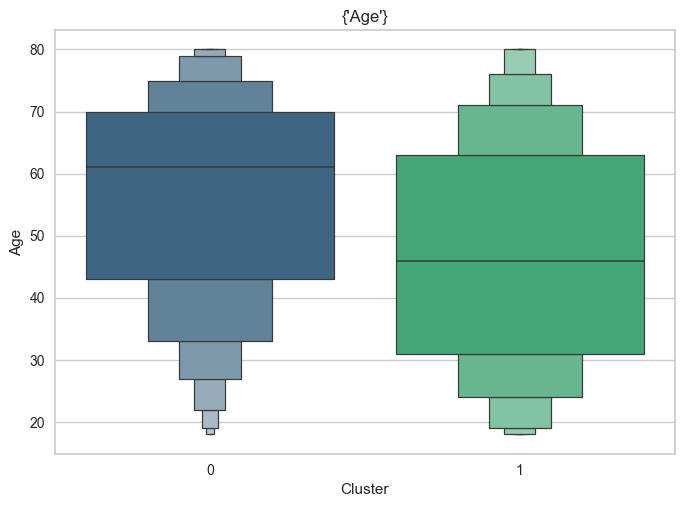

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


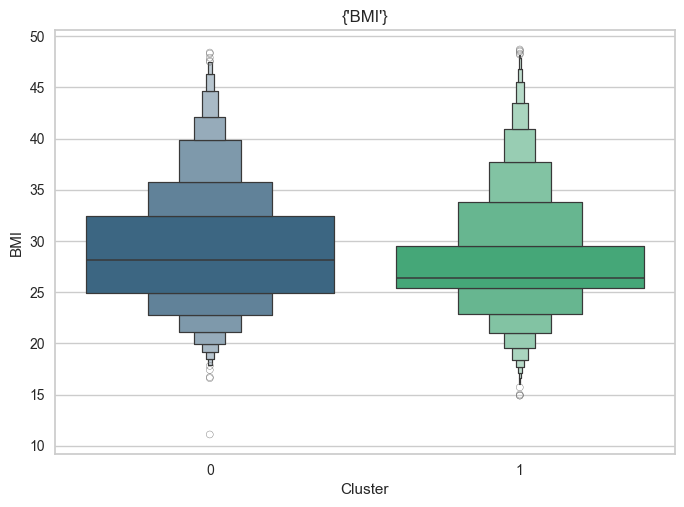

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


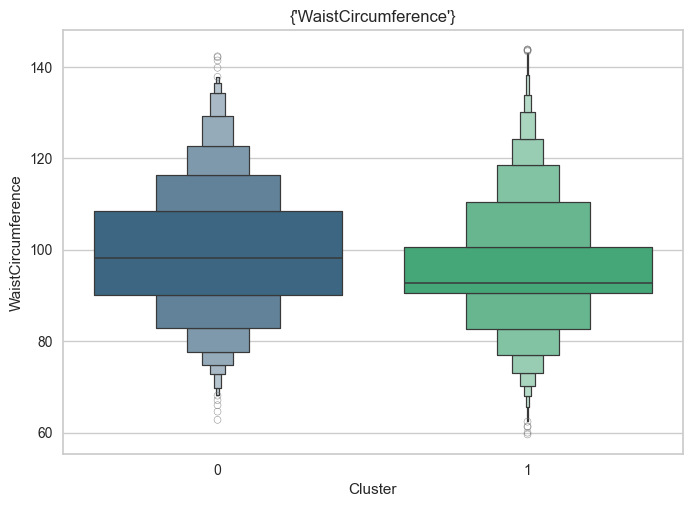

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


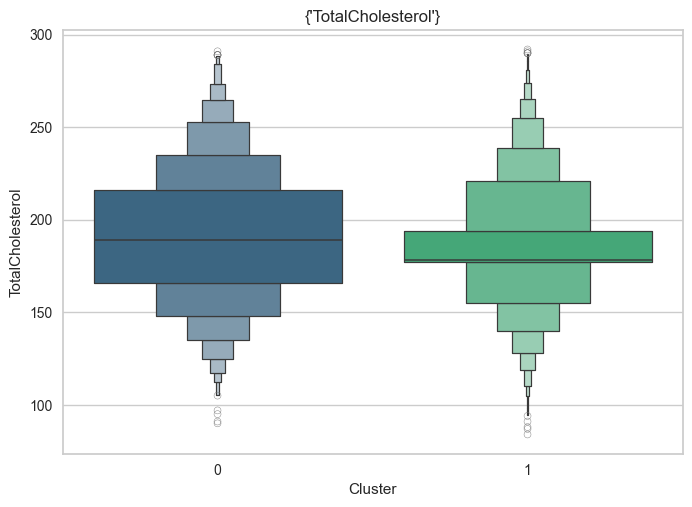

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


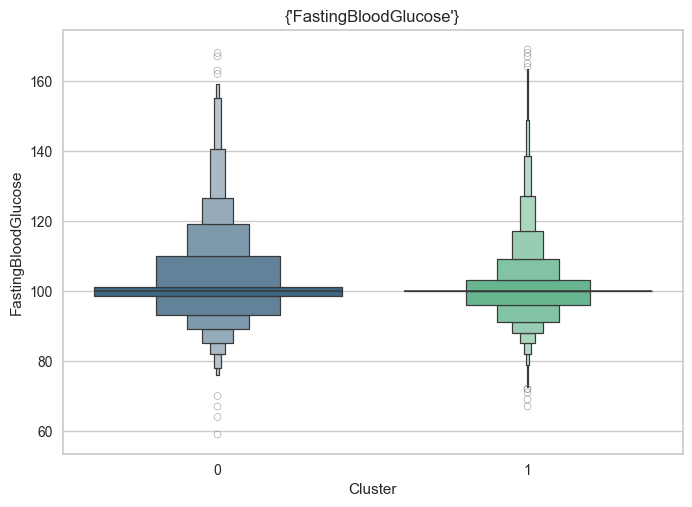

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


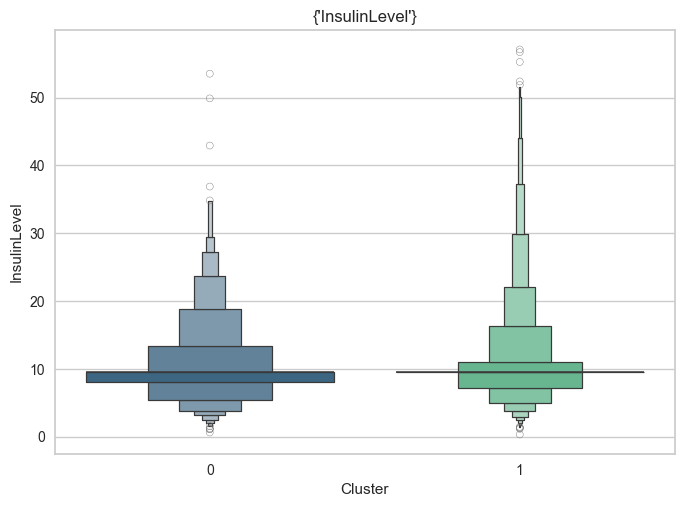

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


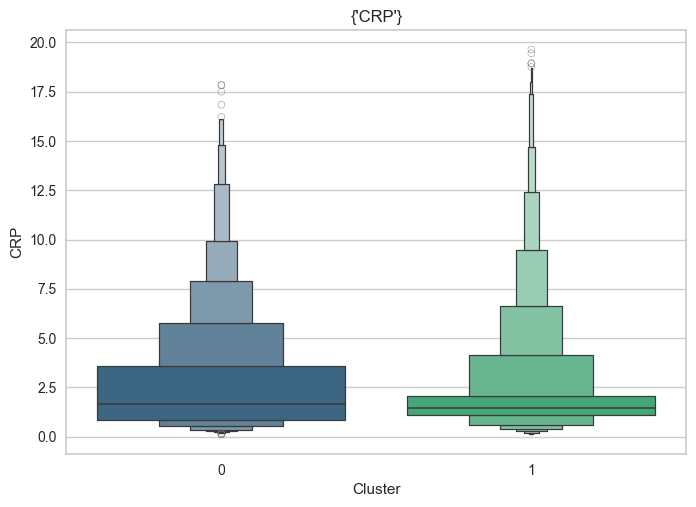

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


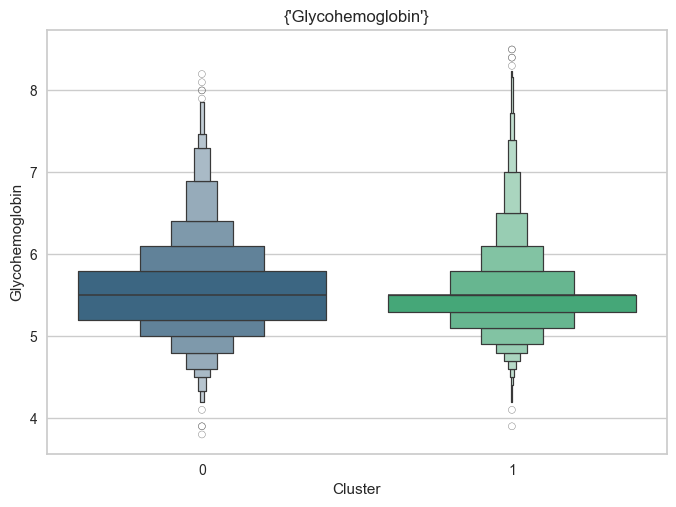

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


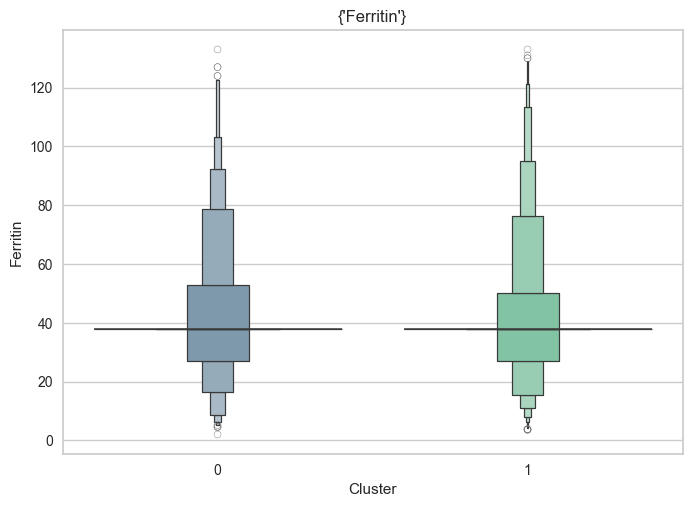

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


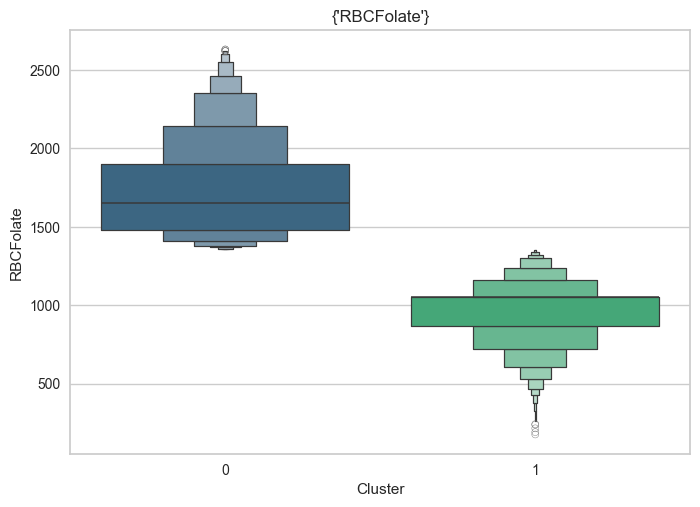

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


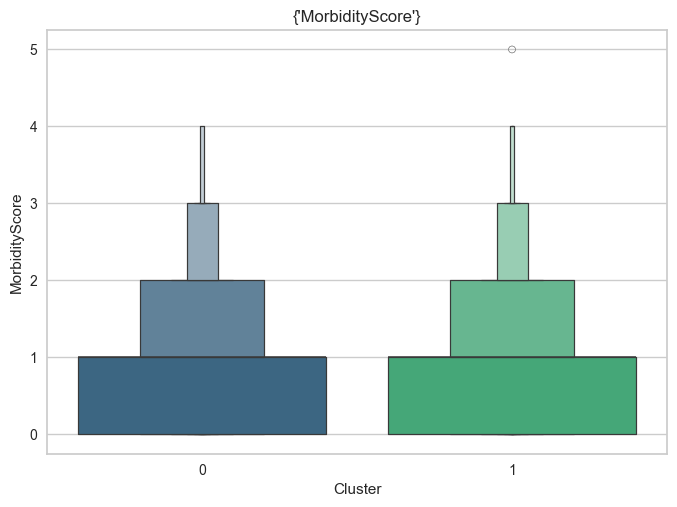

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


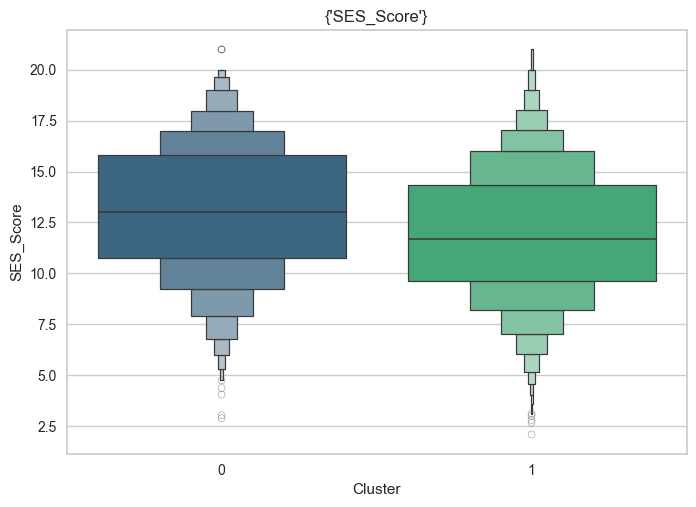

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


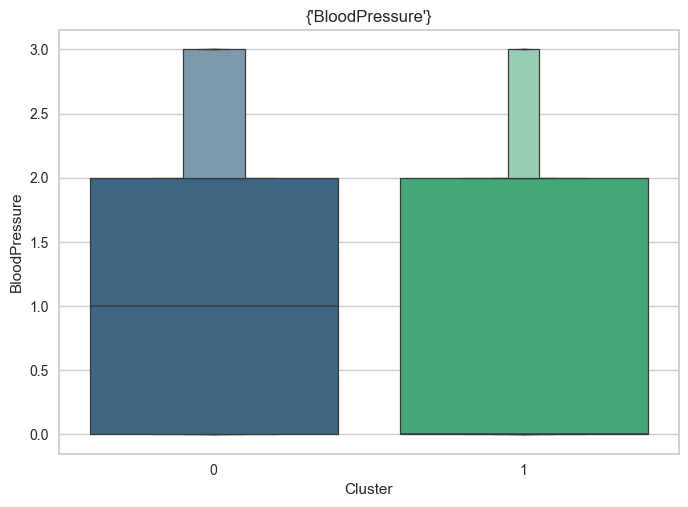

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2636007805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")


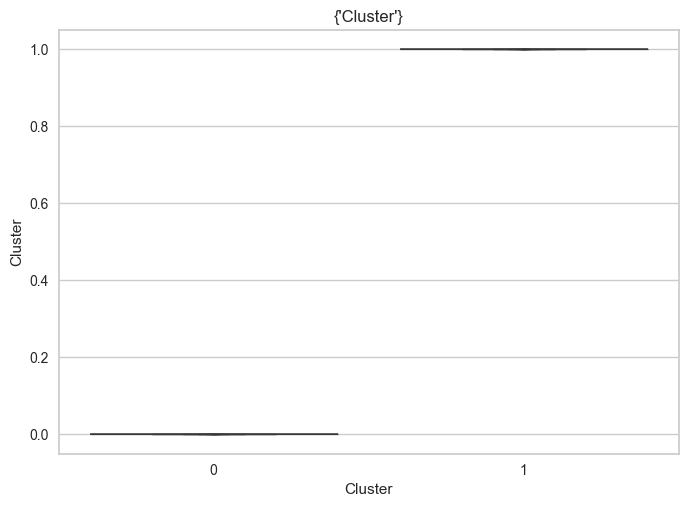

In [511]:
for col in withouPCA_Notscaled_kmeans_df.columns:

  plt.figure()
  pl=sns.boxenplot(y=withouPCA_Notscaled_kmeans_df[col],x=withouPCA_Notscaled_kmeans_df["Cluster"], palette= "viridis")
  pl.set_title({col})
  plt.show()

### With PCA

In [512]:
kmeans_df = df.copy()
kmeans_df_scaled = df_scaled.copy()
kmeans_pca2D = PCA_2D.copy()
kmeans_pca3D = PCA_3D.copy()

##### 2D

In [513]:
withPCA_2D_kmeans_df = df.copy()
withPCA_2D_kmeans_df_scaled = df_scaled.copy()
withPCA_2D_kmeans_pca2D = PCA_2D.copy()
withPCA_2D_kmeans_pca3D = PCA_3D.copy()

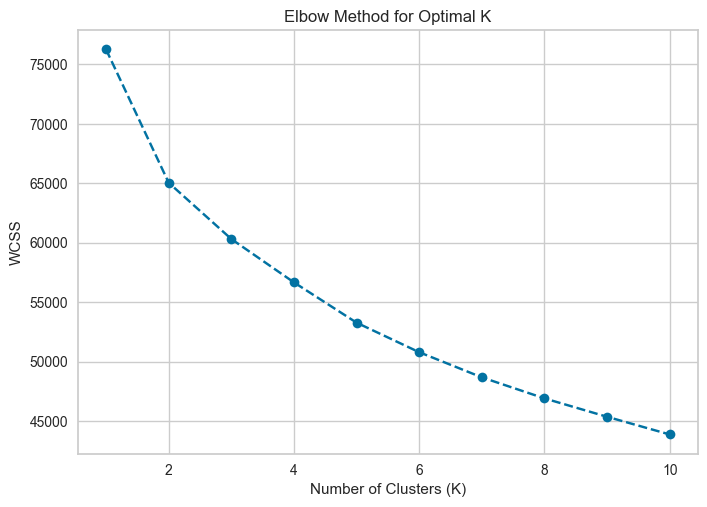

In [514]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10

    kmeans = KMeans(

        n_clusters=k, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
    kmeans.fit(withPCA_2D_kmeans_df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow Method to determine the number of clusters to be formed:



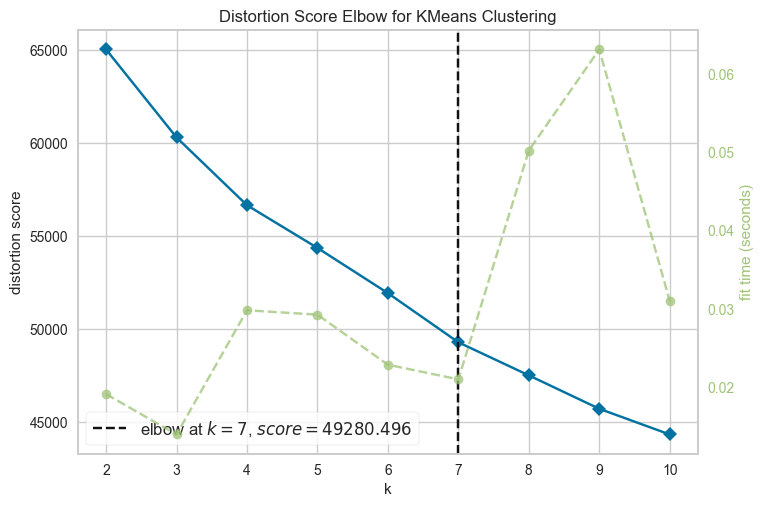

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [515]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(withPCA_2D_kmeans_df_scaled)
Elbow_M.show()

In [516]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(

        n_clusters=4,
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
y_kmeans = kmeans.fit(withPCA_2D_kmeans_pca2D)
withPCA_2D_kmeans_pca2D["Clusters"] = y_kmeans.labels_
withPCA_2D_kmeans_df_scaled["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(withPCA_2D_kmeans_pca2D, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 8545.537224845508
The average silhouette score is : 0.5116426254895005


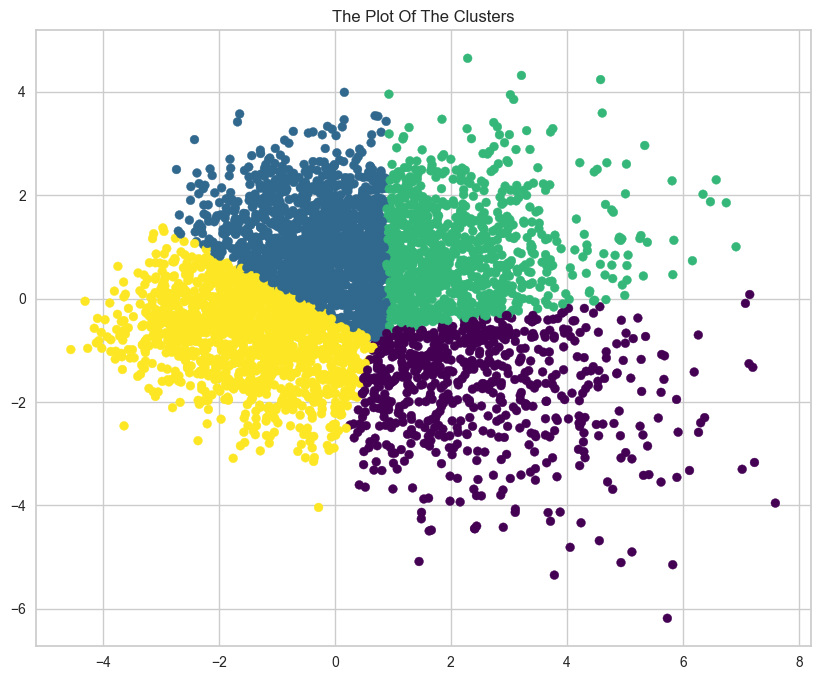

In [568]:

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax =plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=withPCA_2D_kmeans_df_scaled["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
# Group by cluster labels and calculate the mean for each group
cluster_means = kmeans_df.groupby('Clusters').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age        BMI  WaistCircumference  TotalCholesterol  \
Clusters                                                               
0         43.625194  37.276983          115.796267        183.320373   
1         61.256836  25.872266           92.081885        193.478027   
2         64.502680  31.701393          107.873419        193.324759   
3         32.823818  25.674576           89.212177        175.000000   

          FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Clusters                                                                 
0                  102.922240     16.401975  6.031026         5.627994   
1                   99.641602      8.731450  1.538442         5.467187   
2                  106.799571     10.973215  3.232337         5.969025   
3                   98.075825      9.315972  1.611708         5.313113   

           Ferritin    RBCFolate  MorbidityScore  SES_Score  BloodPressure  \
Clusters                                                                     
0         43.602862  1043.424572        0.790047  11.353376       1.021773   
1         37.578076  1150.429688        0.844727  13.099979       0.812988   
2         37.744191  1360.679528        1.159700  12.787409       1.679528   
3         40.185843   993.434880        0.409456  11.399191       0.214095   

           Cluster  
Clusters            
0         0.841369  
1         0.791504  
2         0.571275  
3         0.936664

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


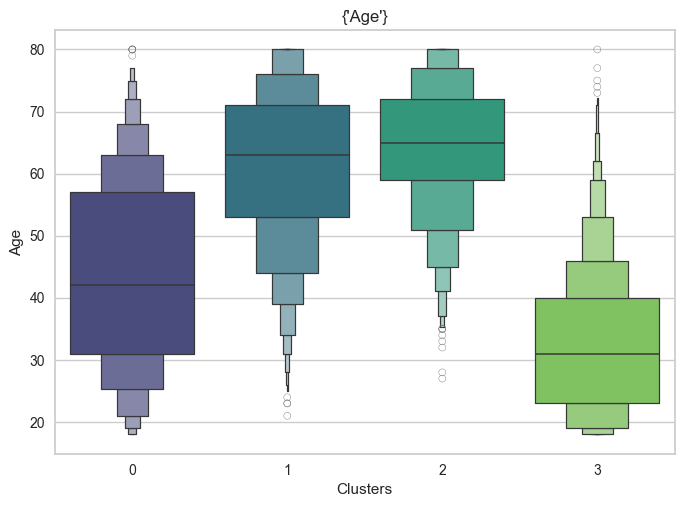

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


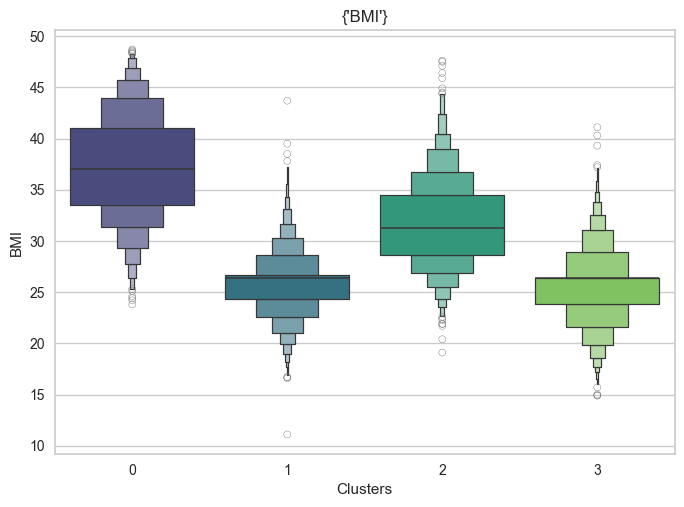

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


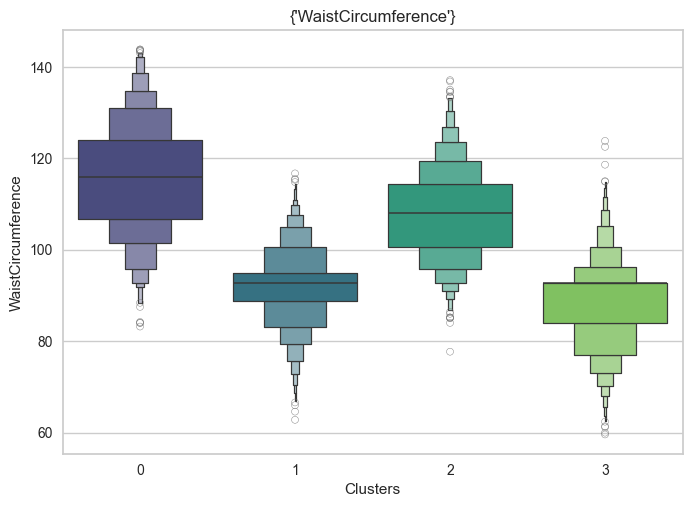

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


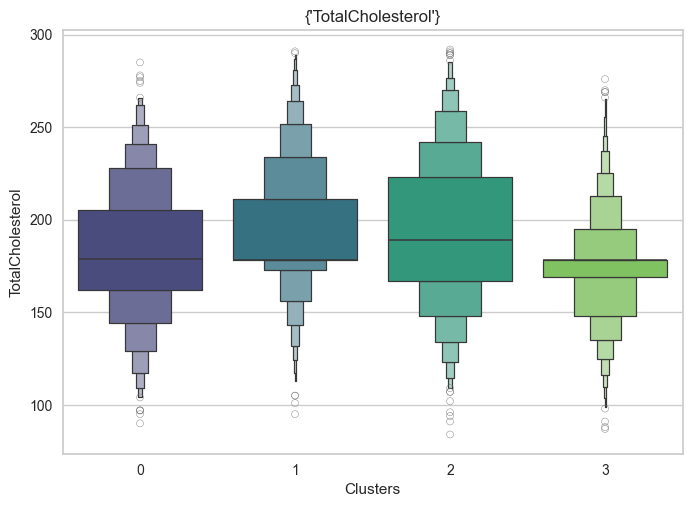

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


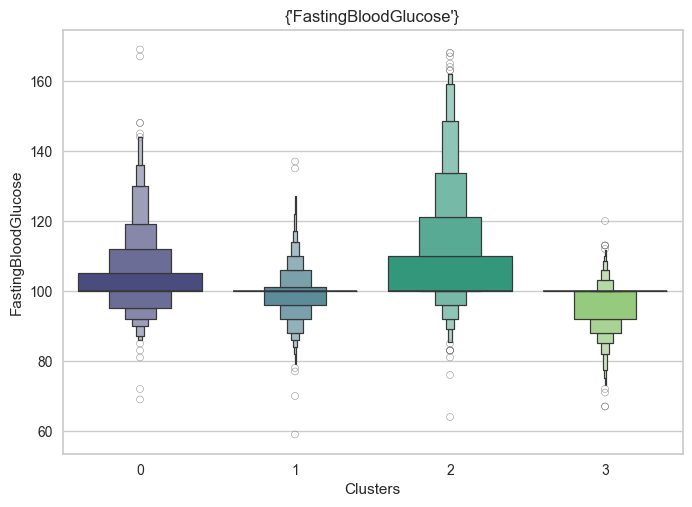

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


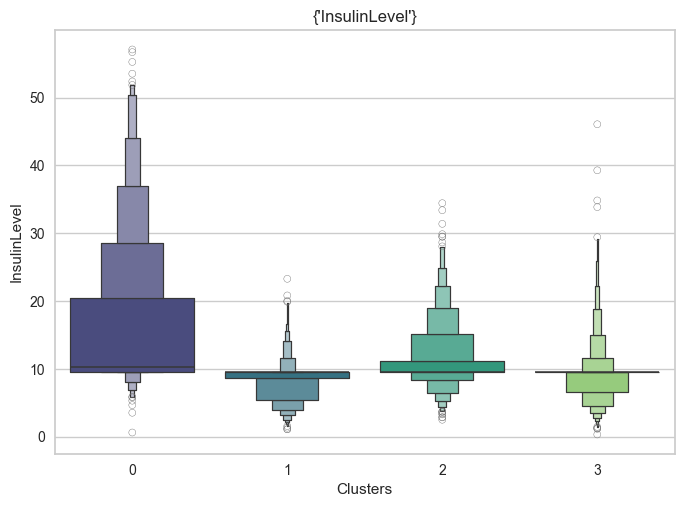

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


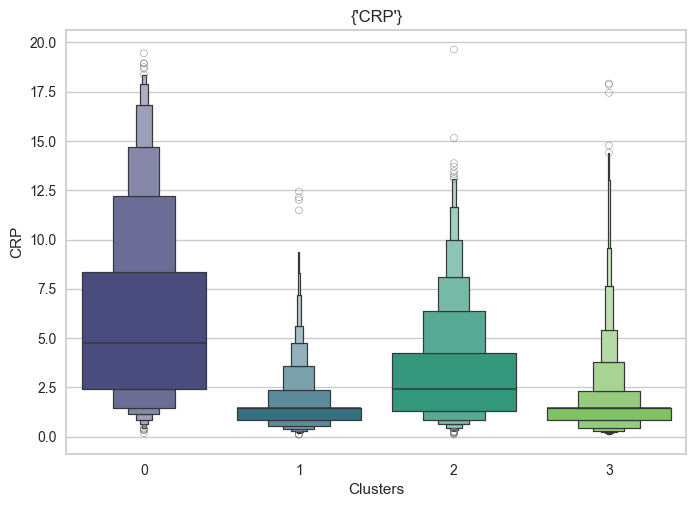

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


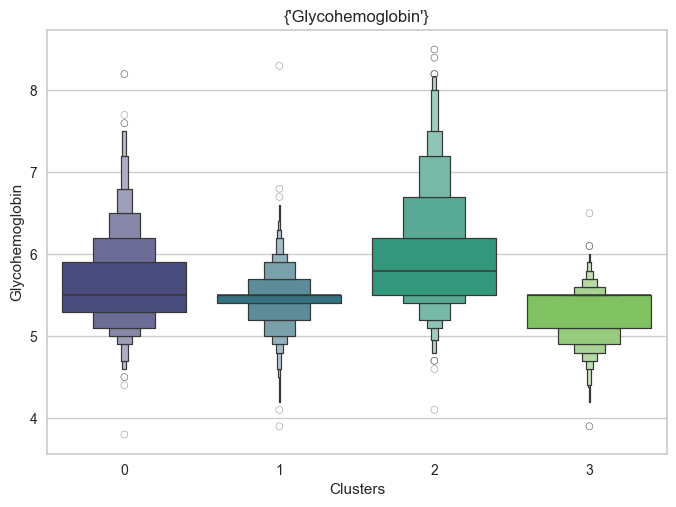

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


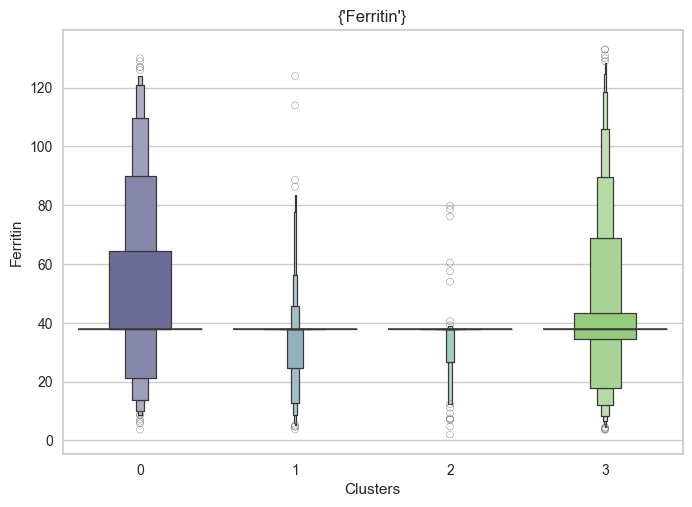

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


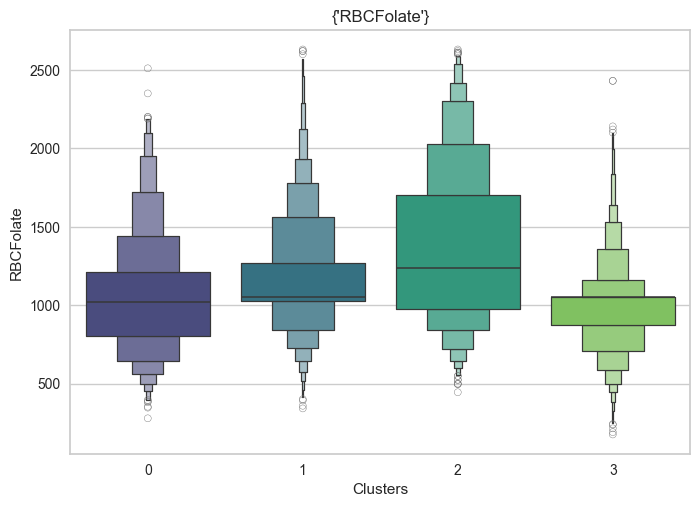

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


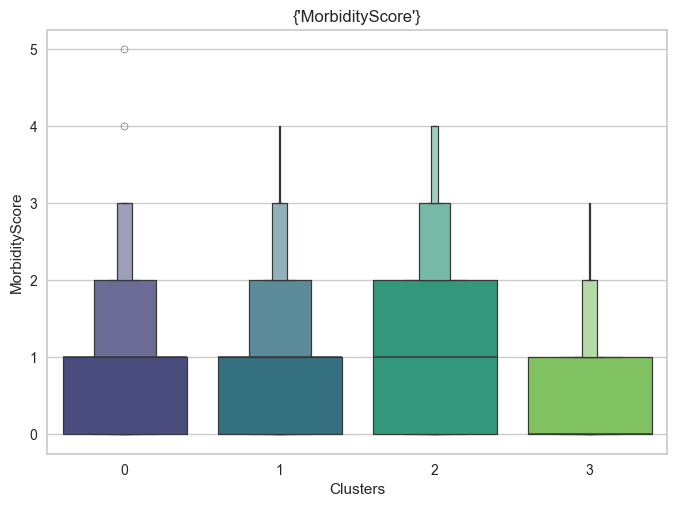

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


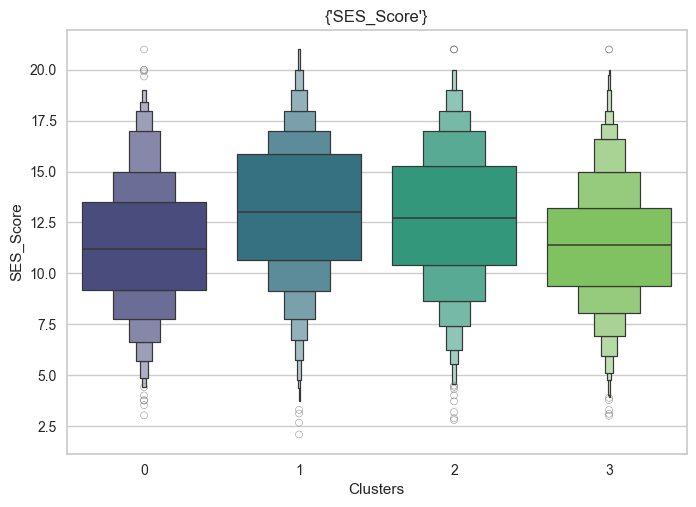

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


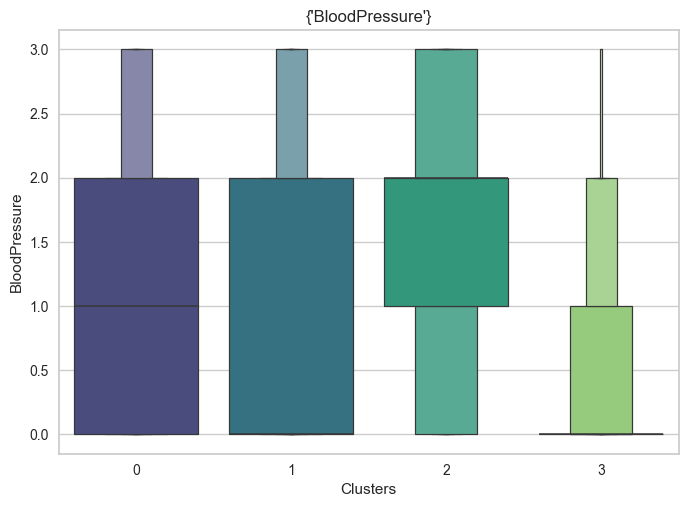

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


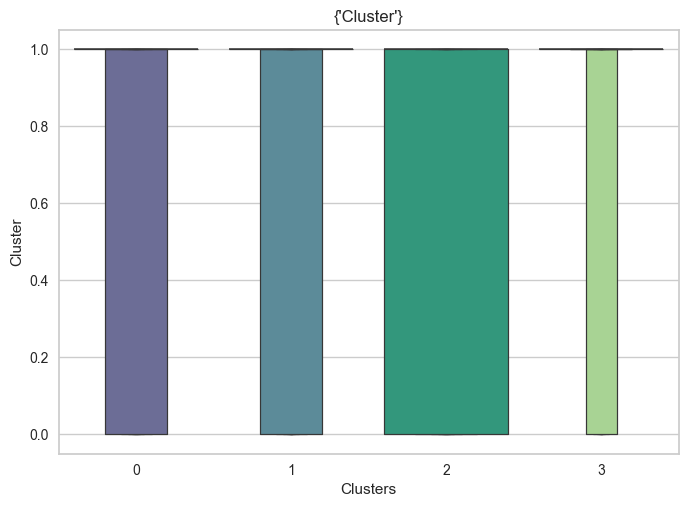

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\749091919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")


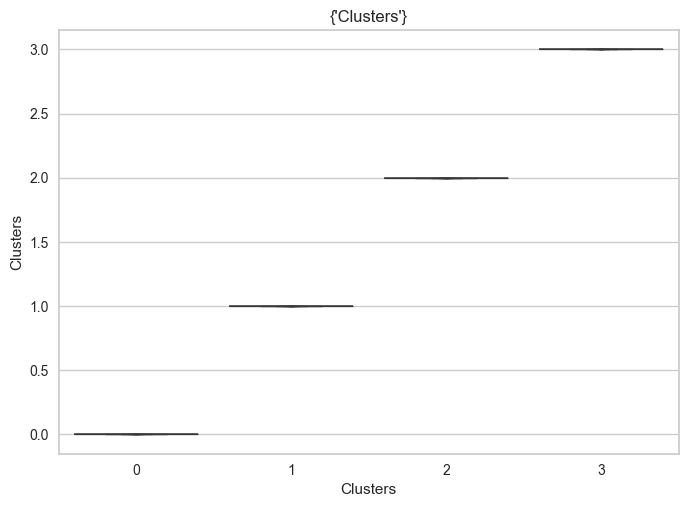

In [ ]:
for col in withPCA_2D_kmeans_df_scaled.columns:

  plt.figure()
  pl=sns.boxenplot(y=kmeans_df[col],x=kmeans_df["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

### 3D


In [569]:
withPCA_3D_kmeans_df = df.copy()
withPCA_3D_kmeans_df_scaled = df_scaled.copy()
withPCA_3D_kmeans_pca2D = PCA_2D.copy()
withPCA_3D_kmeans_pca3D = PCA_3D.copy()

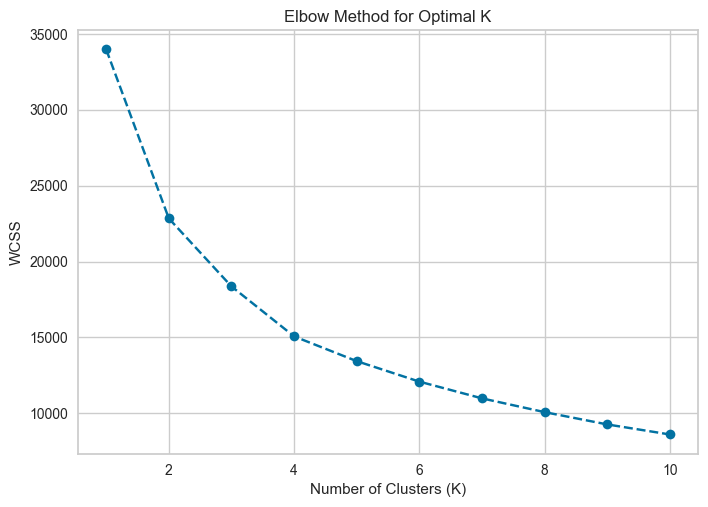

In [570]:
# try elbow method
 
wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10

    kmeans = KMeans(

        n_clusters=k, 
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
    kmeans.fit(withPCA_3D_kmeans_pca3D)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Elbow Method to determine the number of clusters to be formed:



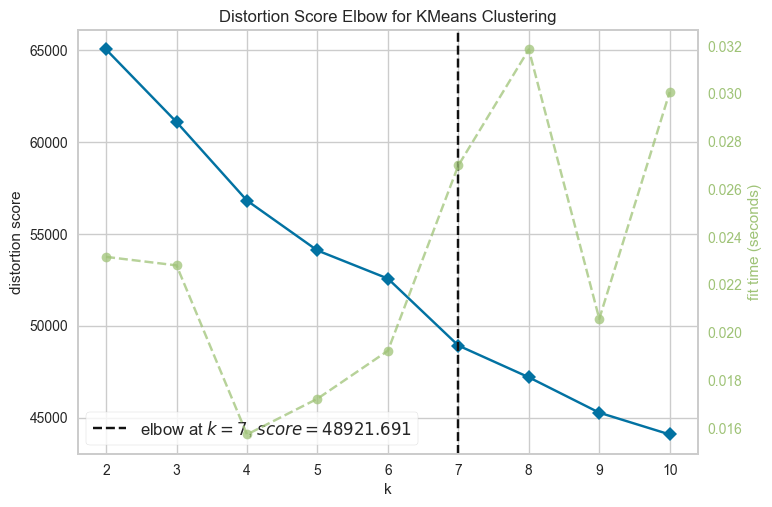

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [571]:
%pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(withPCA_3D_kmeans_df_scaled)
Elbow_M.show()

In [572]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(

        n_clusters=4,
        #init='k-means++', #default
        #n_init=10, #default
        #max_iter=300, #default
        #tol=0.0001, #default
        #precompute_distances='auto', #default
        #verbose=0, #default
        #algorithm='lloyd', #default
        random_state=42, 
        n_init=10
    )
y_kmeans = kmeans.fit(kmeans_pca3D)
withPCA_3D_kmeans_pca3D["Clusters"] = y_kmeans.labels_
withPCA_3D_kmeans_df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(withPCA_3D_kmeans_pca3D, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 15072.918257308105
The average silhouette score is : 0.36158807263941994


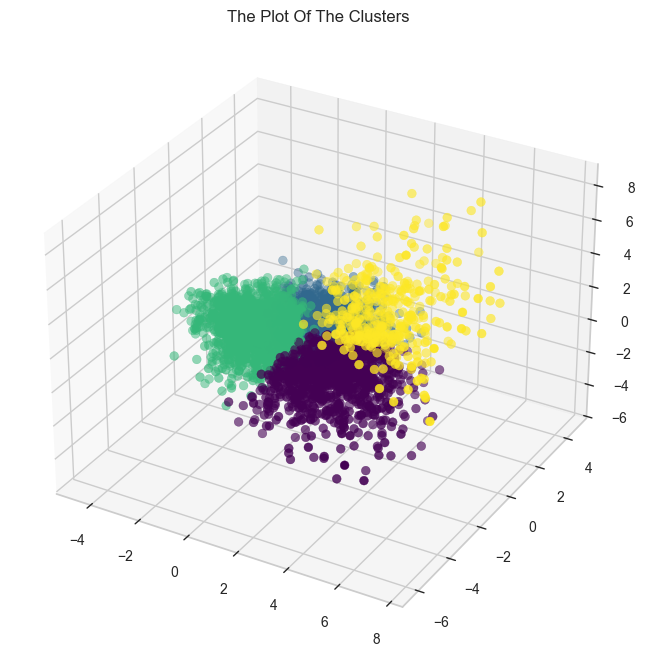

In [575]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=withPCA_3D_kmeans_pca3D["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [577]:
# Group by cluster labels and calculate the mean for each group
cluster_means = withPCA_3D_kmeans_df.groupby('Clusters').mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

# Display the DataFrame
cluster_means_df.head()

Age        BMI  WaistCircumference  TotalCholesterol  \
Clusters                                                               
0         47.450861  36.121175          114.343364        194.653495   
1         63.284161  26.470652           94.023499        197.012940   
2         36.401793  25.457560           88.981839        174.917771   
3         65.015748  31.439108          107.250919        171.257218   

          FastingBloodGlucose  InsulinLevel       CRP  Glycohemoglobin  \
Clusters                                                                 
0                  100.018237     12.938440  5.175015         5.519554   
1                   99.902692      8.802381  1.709984         5.495238   
2                   98.491816      9.280417  1.530744         5.350234   
3                  118.937008     15.650682  3.460840         6.570604   

           Ferritin    RBCFolate  MorbidityScore  SES_Score  BloodPressure  
Clusters                                                                    
0         42.777102  1147.465046        0.801418  12.348253       1.215805  
1         37.899871  1226.413561        0.923395  13.512273       1.076605  
2         39.084108   993.856586        0.439984  11.333645       0.210834  
3         38.255013  1237.748031        1.401575  11.131361       1.438320

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


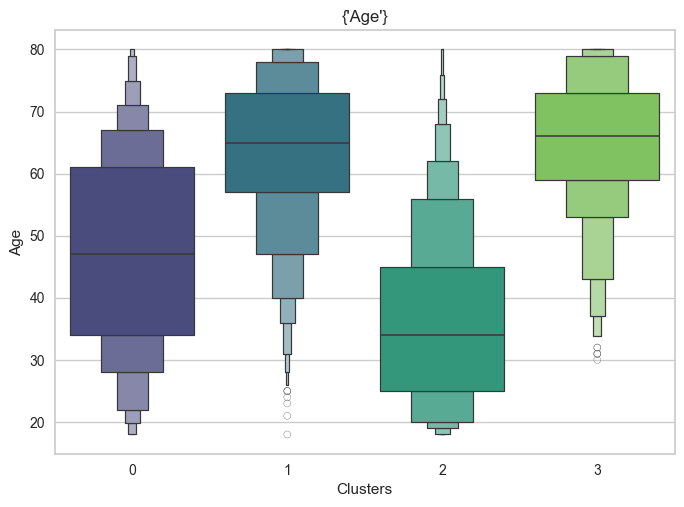

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


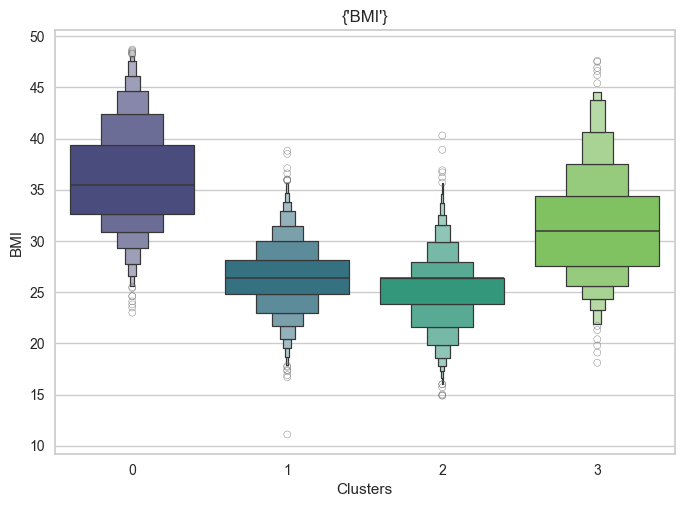

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


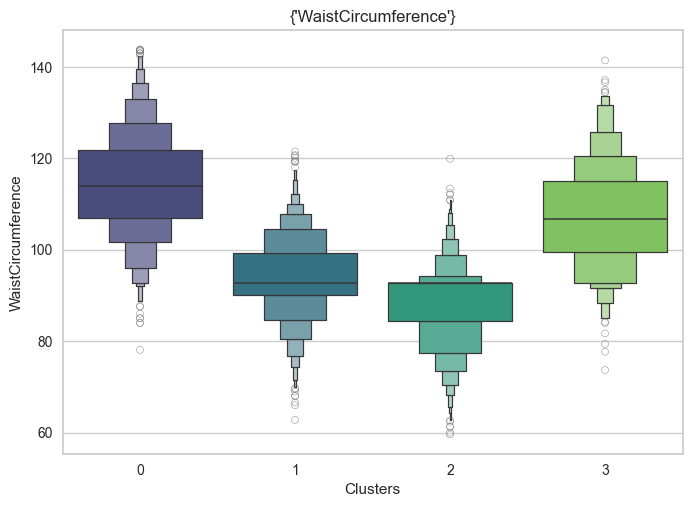

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


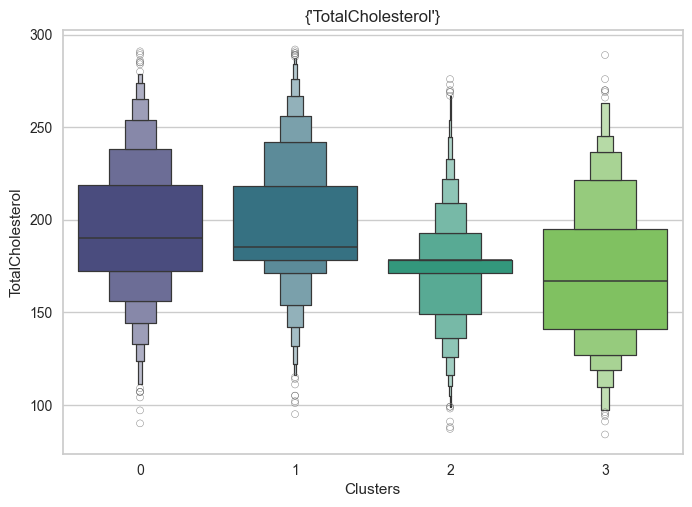

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


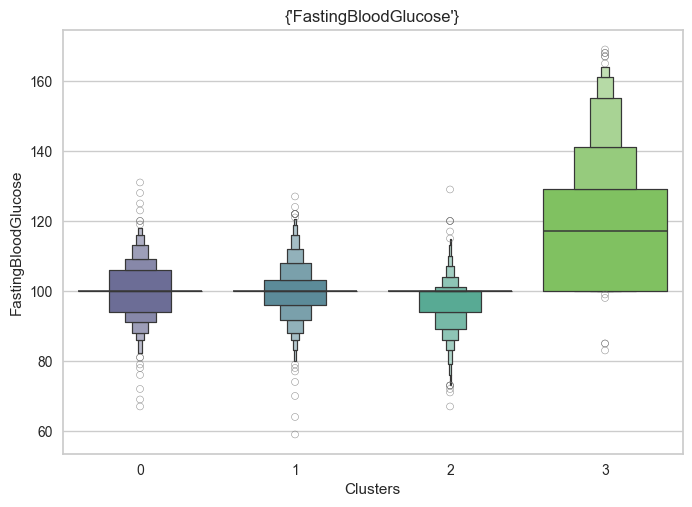

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


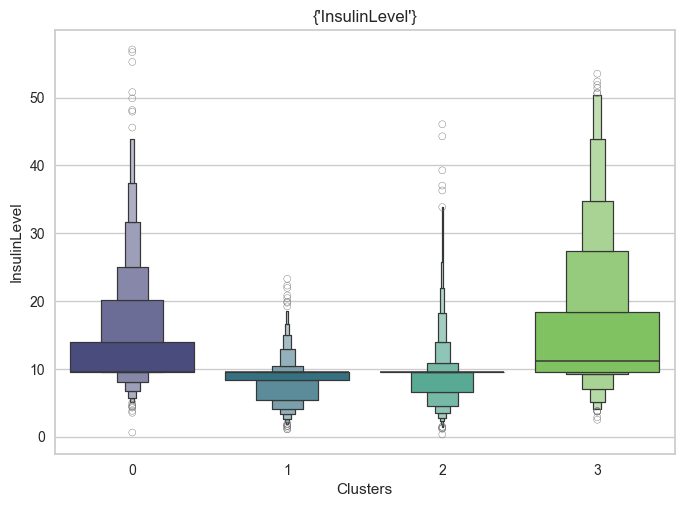

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


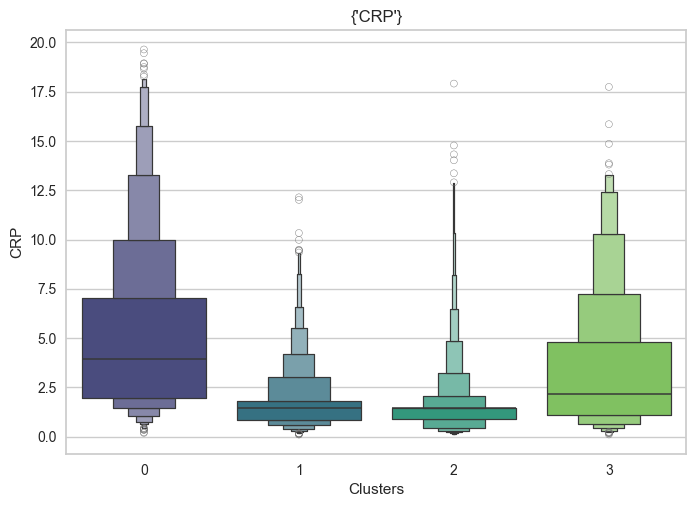

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


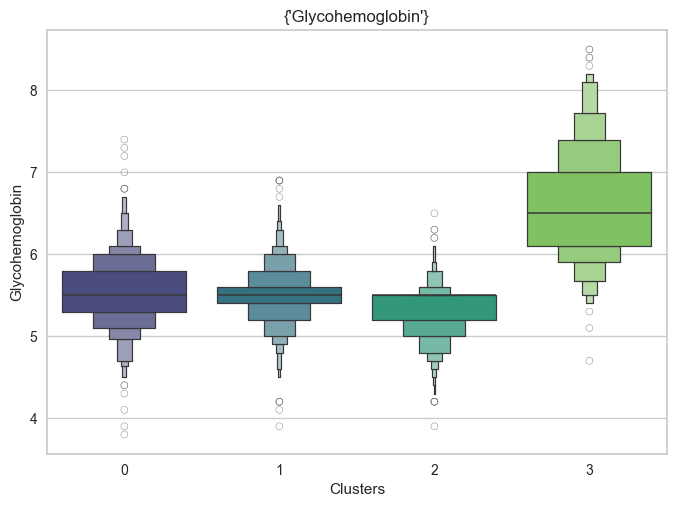

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


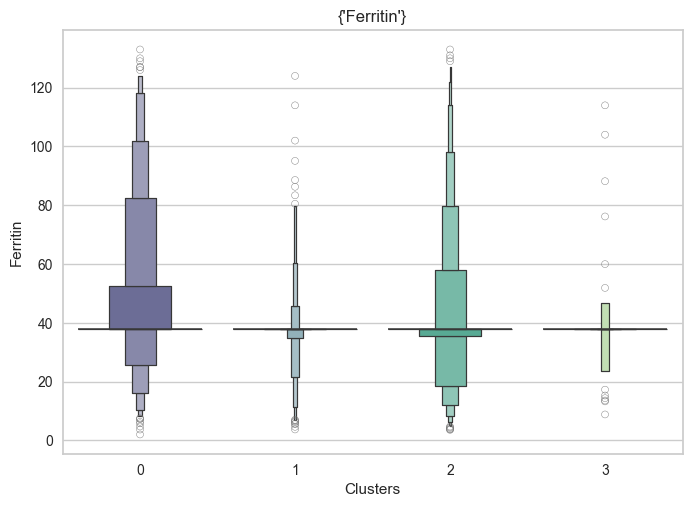

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


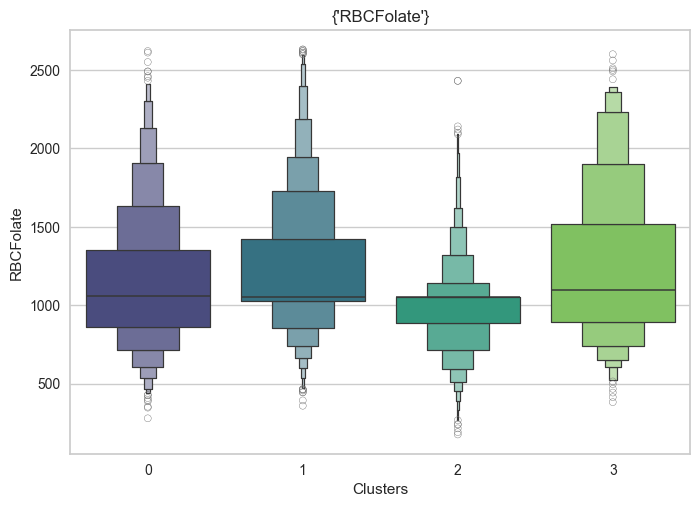

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


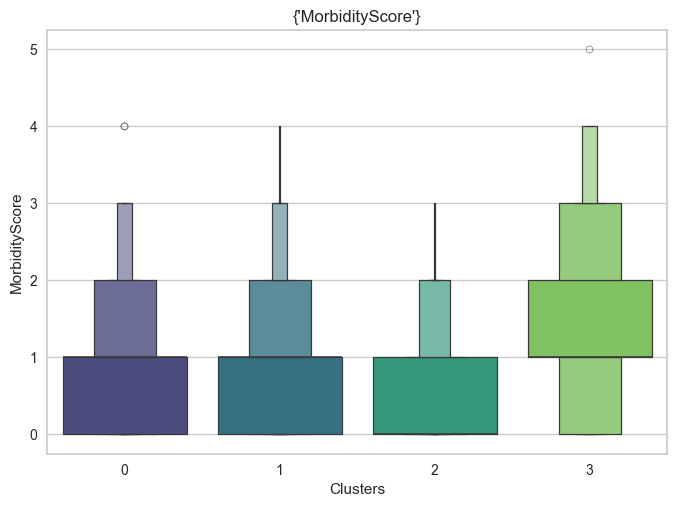

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


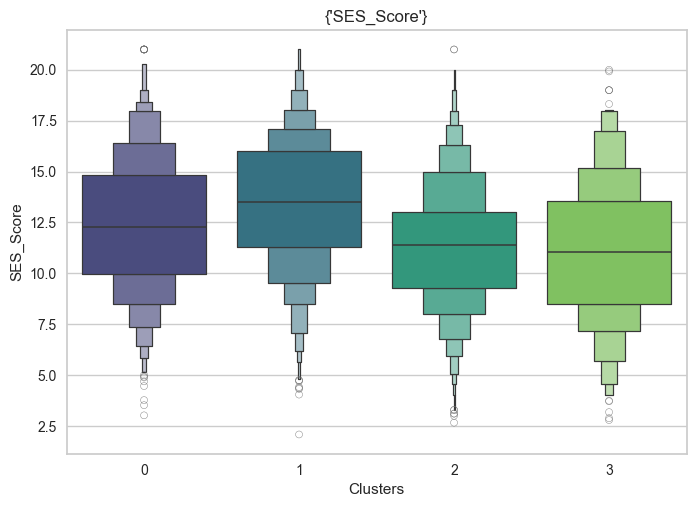

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\2311116827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")


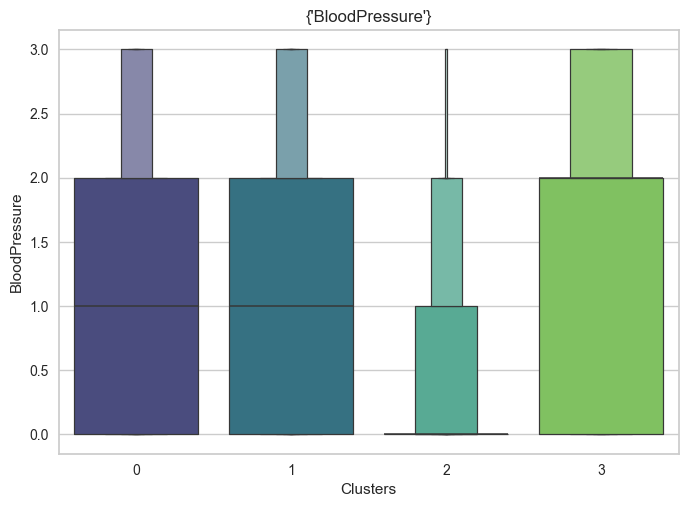

In [578]:
for col in kmeans_df.columns:

  plt.figure()
  pl=sns.boxenplot(y=kmeans_df[col],x=withPCA_3D_kmeans_df["Clusters"], palette= "viridis")
  pl.set_title({col})
  plt.show()

## DB Scan

In [ ]:
dbscan_df = df.copy()
dbscan_df_scaled = df_scaled.copy()
dbscan_pca = PCA_ds.copy()

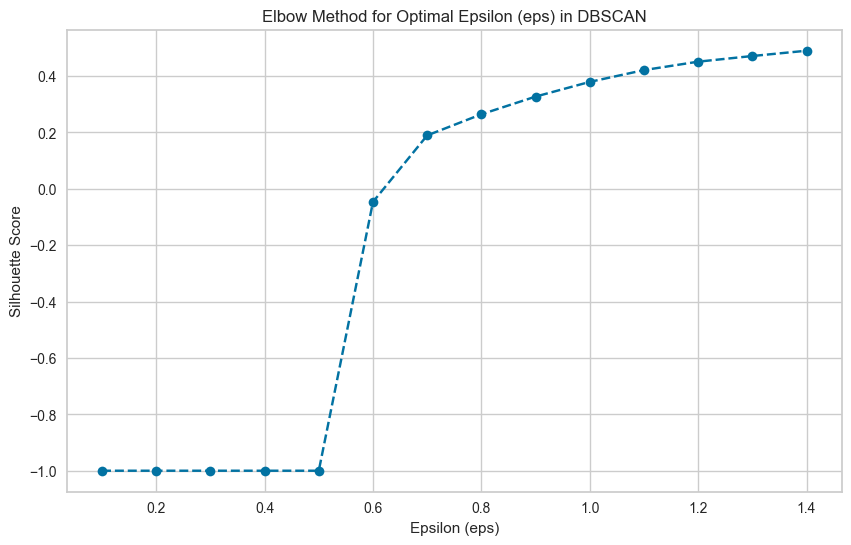

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of eps values to test
eps_values = np.arange(0.1, 1.5, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=1000)
    labels = dbscan.fit_predict(dbscan_pca)
    
    # Calculate silhouette score only if more than one cluster is formed
    if len(set(labels)) > 1:
        score = silhouette_score(dbscan_pca, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid score for single cluster

# Plot the silhouette scores for different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Epsilon (eps) in DBSCAN')
plt.show()

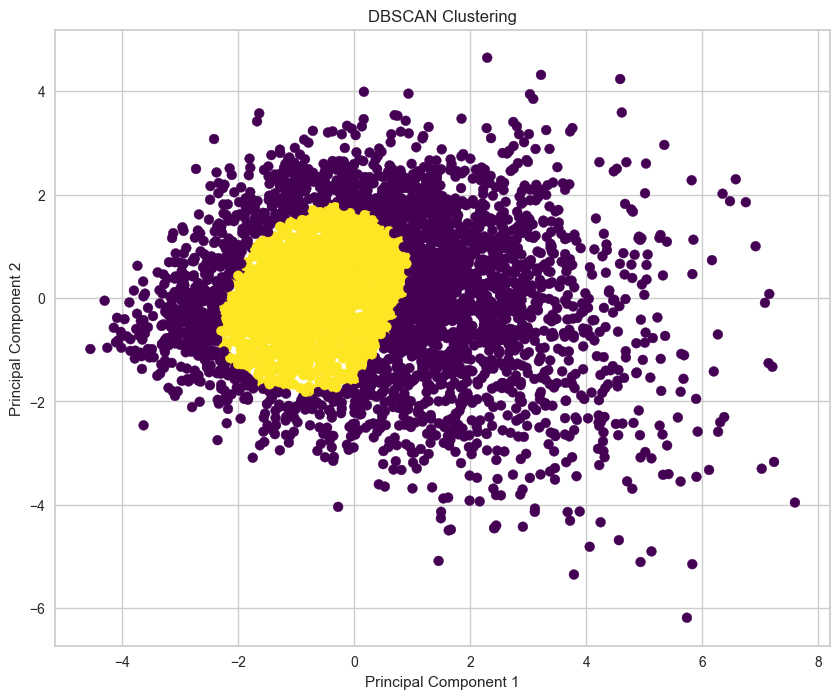

Number of clusters formed by DBSCAN: 2
The average silhouette score is : 0.3040055834119983


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(
    #parameters
    eps=0.8,    # The maximum distance between two samples for one to be considered as in the neighborhood of the other     
    min_samples=1000,
    #metric='euclidean', #default
    #algorithm='auto', #default
    leaf_size=20 #default = 30
    #p=None, #defaul
)
dbscan_labels = dbscan.fit_predict(dbscan_pca)

# Add DBSCAN labels to the PCA dataframe
dbscan_pca['DBSCAN_Cluster'] = dbscan_labels

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 8))
plt.scatter(dbscan_pca["col1"], dbscan_pca["col2"], c=dbscan_pca["DBSCAN_Cluster"], s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#display the number of clusters formed
print(f"Number of clusters formed by DBSCAN: {len(set(dbscan_labels))}")

#display the silhouette score
silhouette_avg = silhouette_score(dbscan_pca, dbscan_labels)
print(f"The average silhouette score is : {silhouette_avg}")


C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


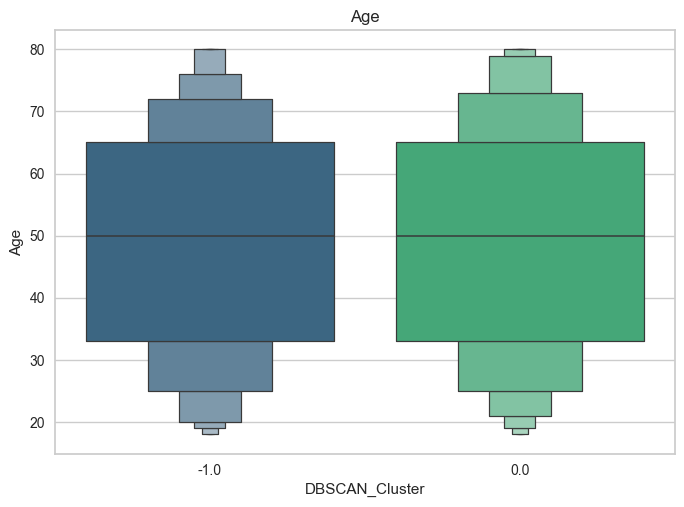

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


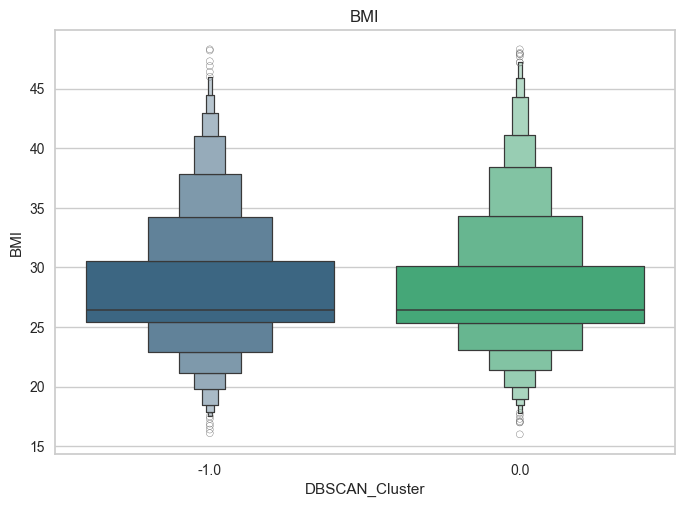

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


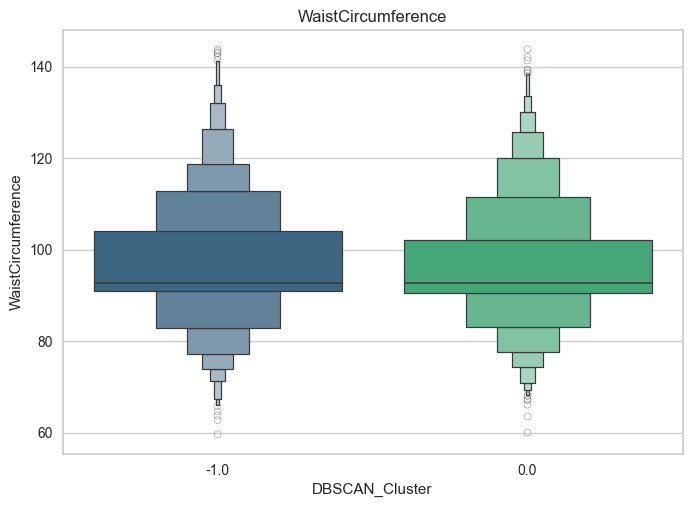

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


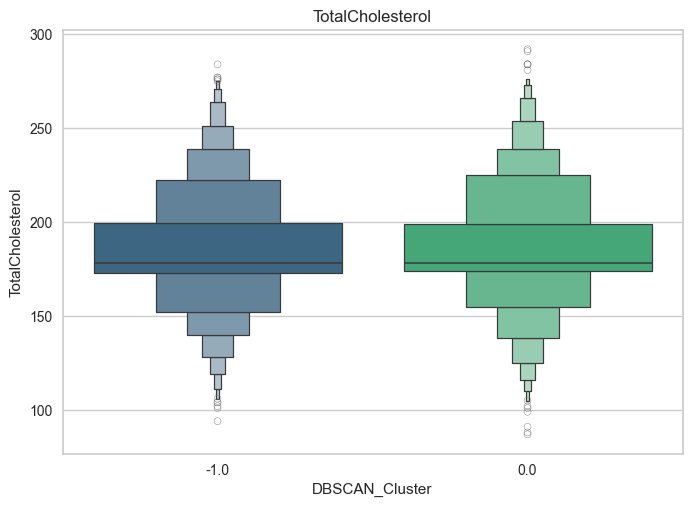

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


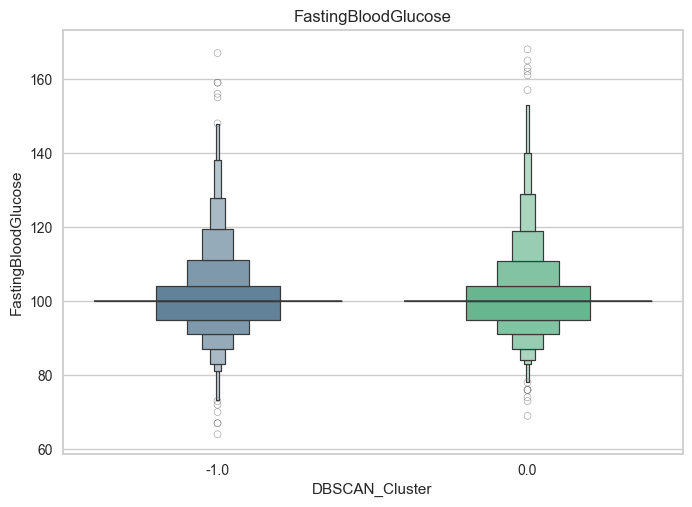

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


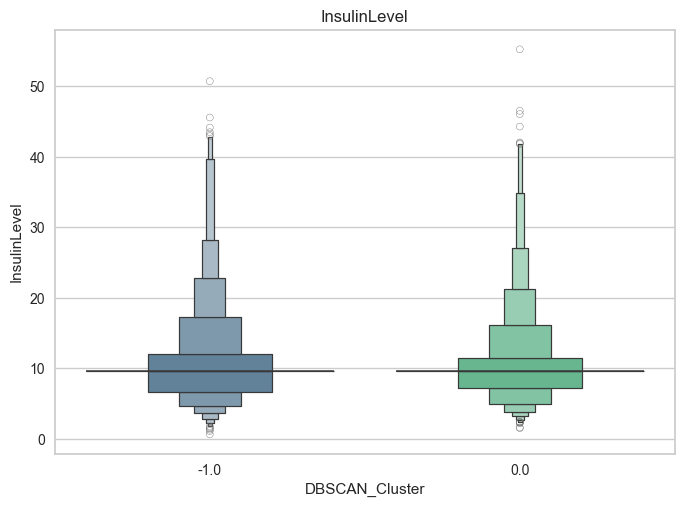

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


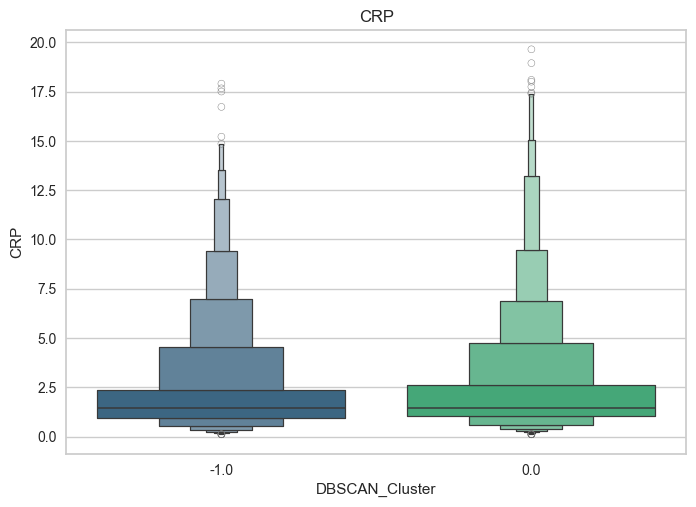

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


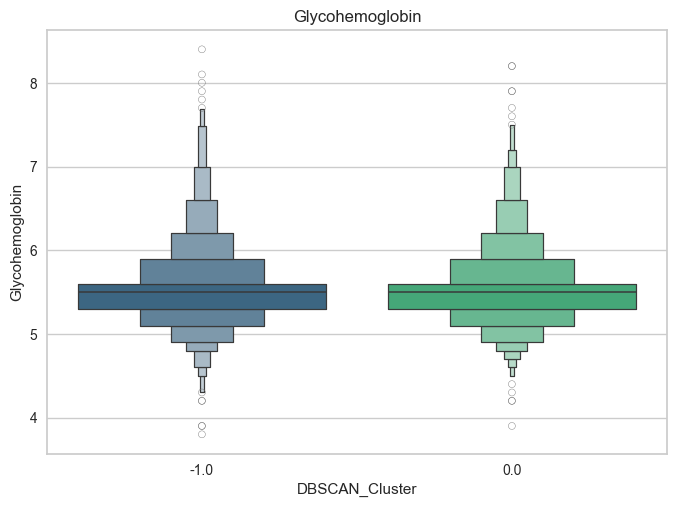

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


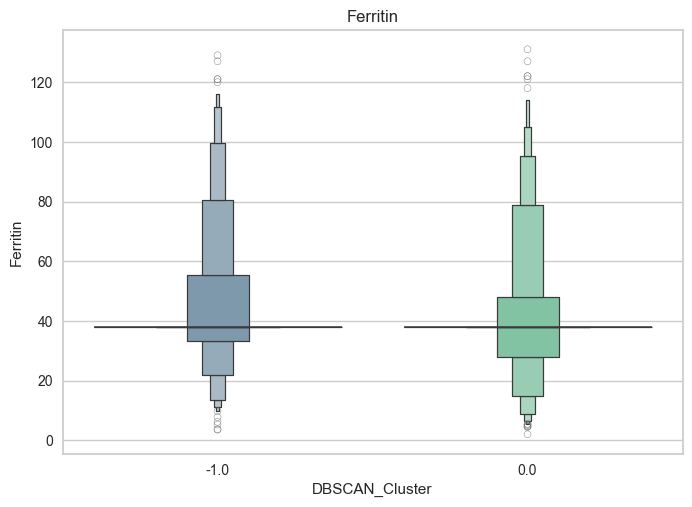

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


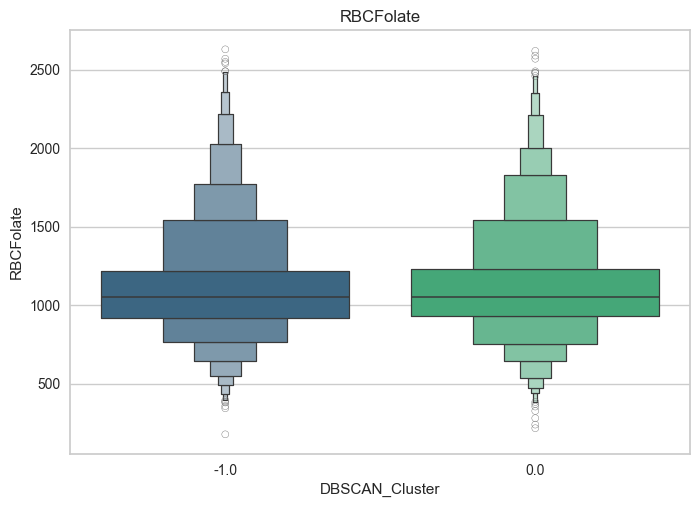

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


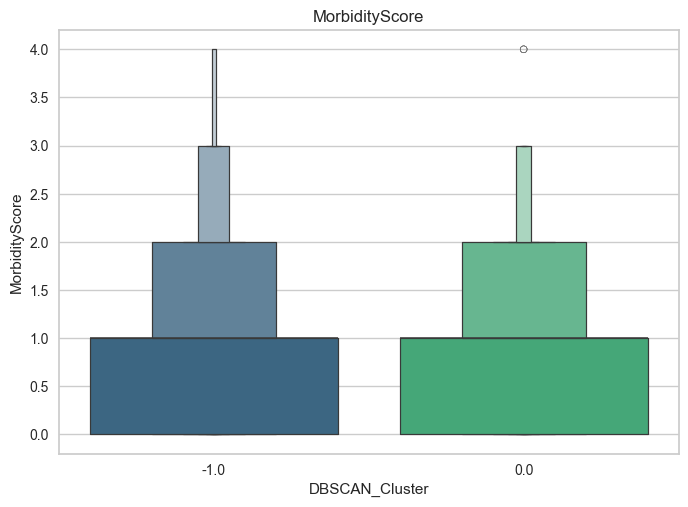

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


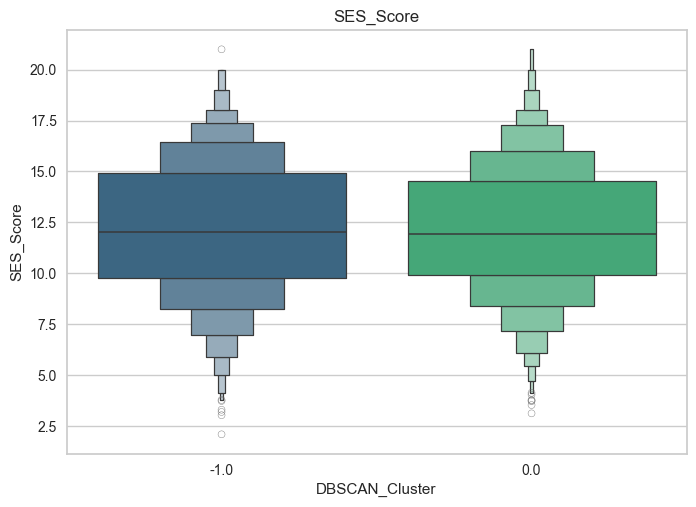

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1738444918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")


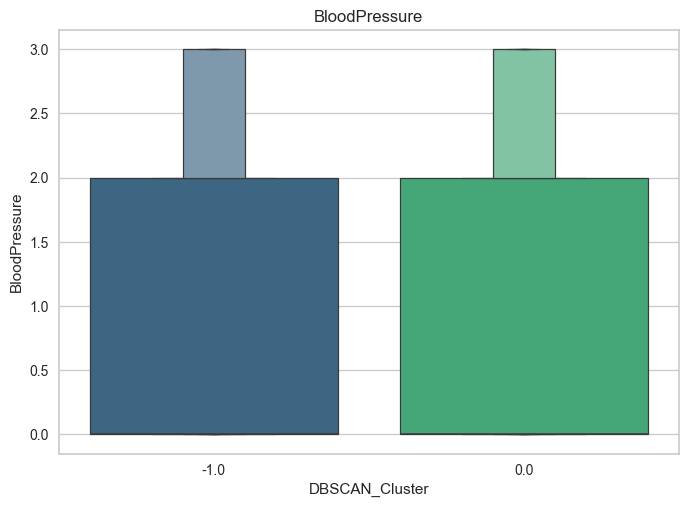

In [ ]:
for col in dbscan_df.columns:
  plt.figure()
  pl = sns.boxenplot(y=dbscan_df[col], x=dbscan_pca["DBSCAN_Cluster"], palette="viridis")
  pl.set_title(col)
  plt.show()


## Agglo 

In [ ]:
agglo_df = df.copy()
agglo_df_scaled = df_scaled.copy()
agglo_pca = PCA_ds.copy()

In [ ]:
# Perform Agglomerative Clustering

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_pca_clusters = agglo.fit_predict(agglo_pca)
agglo_pca['Cluster'] = df_pca_clusters

# # Plot Dendrogram
# plt.figure(figsize=(10, 6))
# sch.dendrogram(sch.linkage(agglo_pca[['col1', 'col2']], method='ward'))
# plt.title("Dendrogram for Agglomerative Clustering")
# plt.xlabel("Samples")
# plt.ylabel("Euclidean Distance")
# plt.show()

In [ ]:
df.head()

Age   BMI  WaistCircumference  TotalCholesterol  FastingBloodGlucose  \
0  43.0  27.0                98.3             264.0                113.0   
1  66.0  33.5               114.7             214.0                 99.0   
2  44.0  29.7                93.5             187.0                156.0   
6  43.0  26.4                92.7             178.0                100.0   
7  65.0  26.4                92.7             178.0                100.0   

   InsulinLevel   CRP  Glycohemoglobin  Ferritin  RBCFolate  MorbidityScore  \
0         15.53  1.78              5.6      38.0      698.0             0.0   
1         19.91  2.03              5.6      38.0      933.0             2.0   
2         16.33  5.62              6.2      13.3      830.0             3.0   
6          9.63  1.45              5.5      38.0     1050.0             0.0   
7          9.63  1.45              5.5      38.0     1050.0             1.0   

   SES_Score  BloodPressure  
0      20.00              2  
1      19.00              2  
2      10.41              0  
6       5.63              0  
7      16.00              0

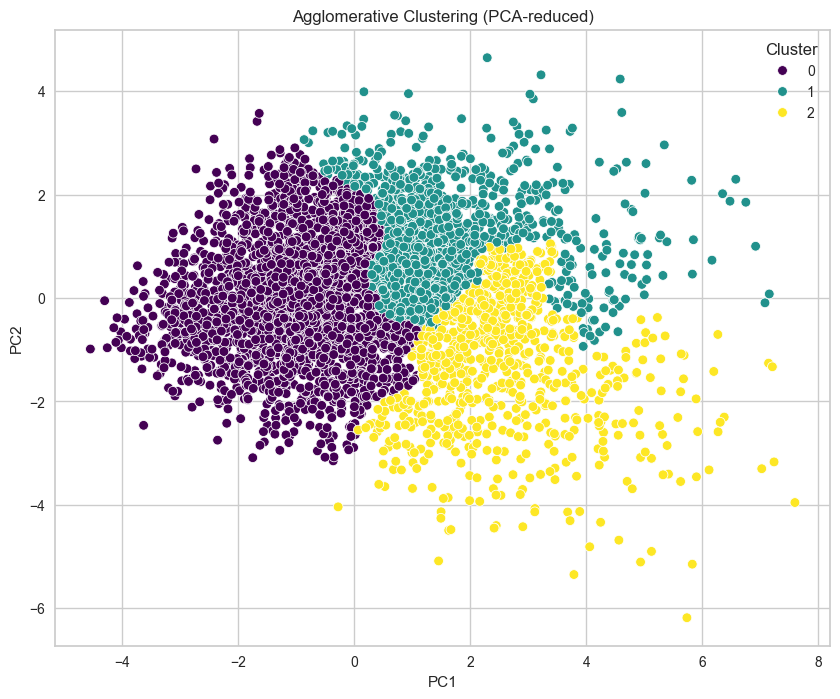

In [ ]:
# Scatter plot for clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=agglo_pca['col1'], y=agglo_pca['col2'], hue=agglo_pca['Cluster'], palette='viridis')
plt.title("Agglomerative Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(agglo_pca[['col1', 'col2']], agglo_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.38286978854250375


C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


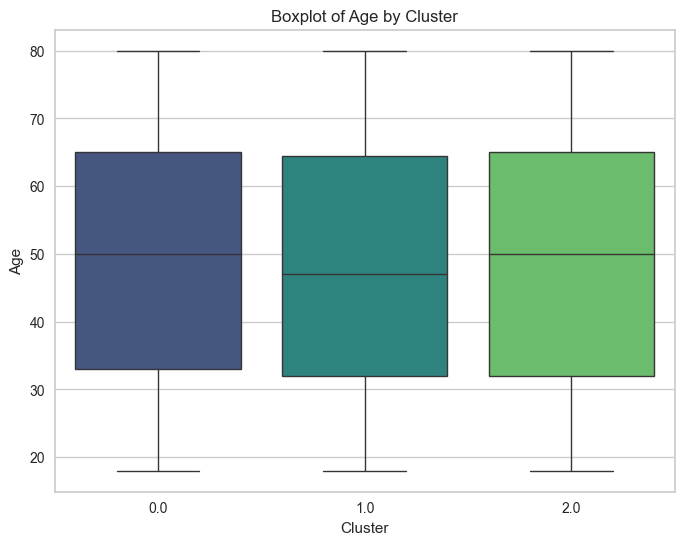

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


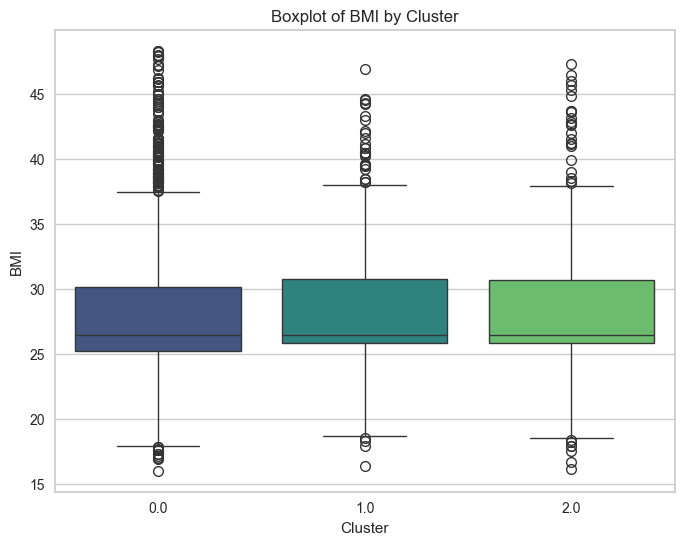

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


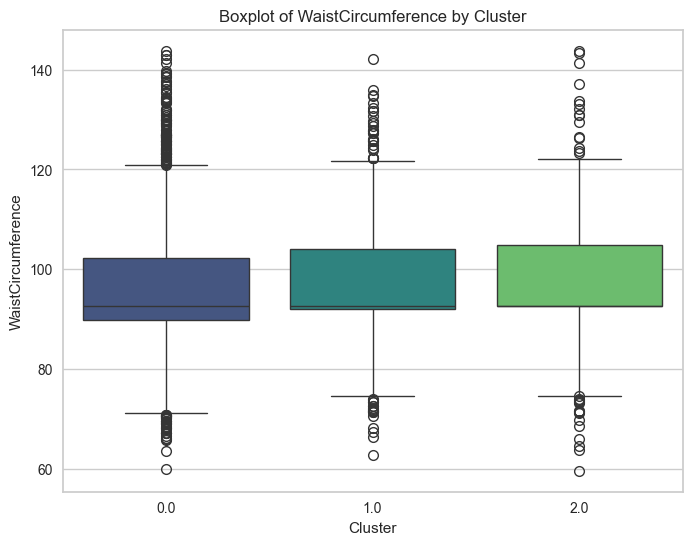

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


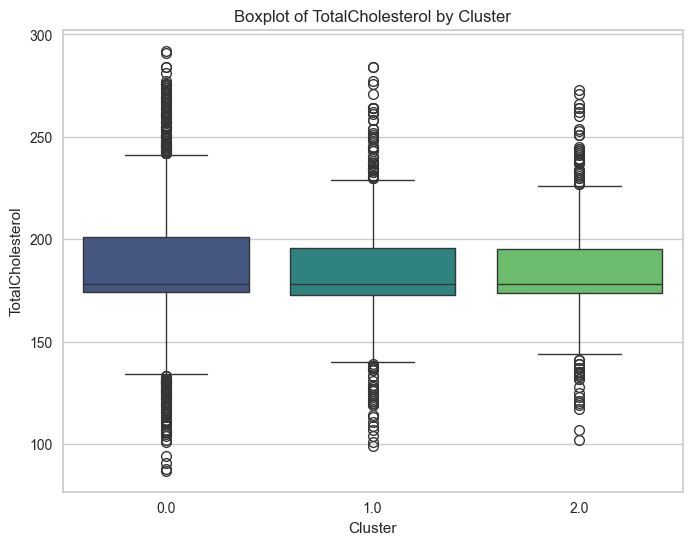

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


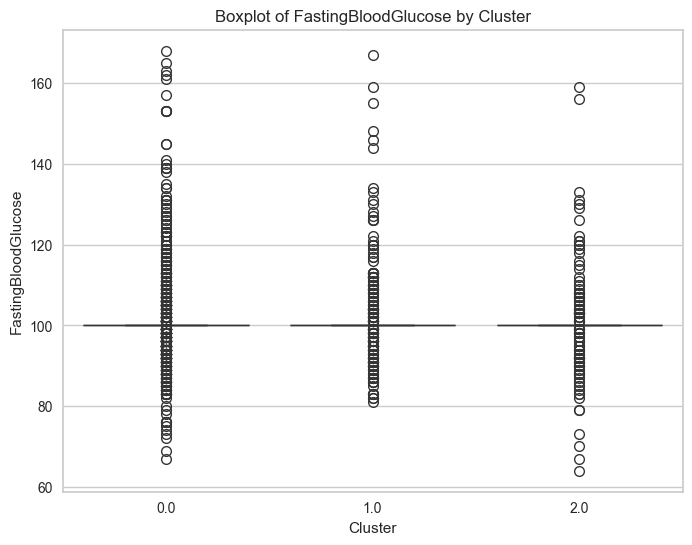

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


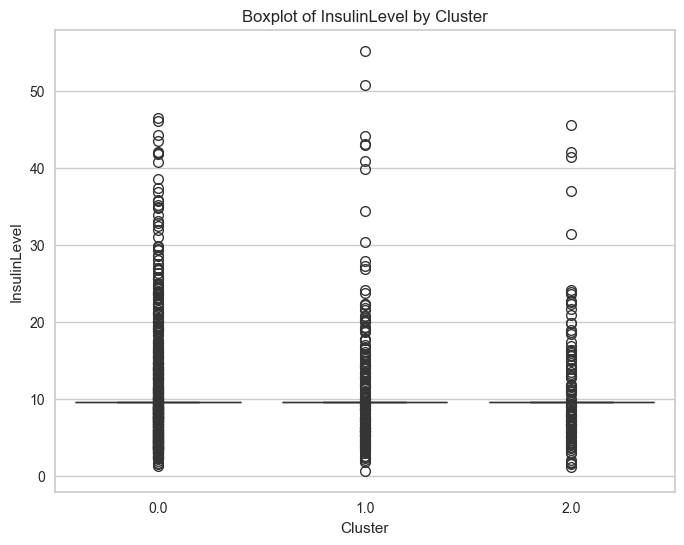

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


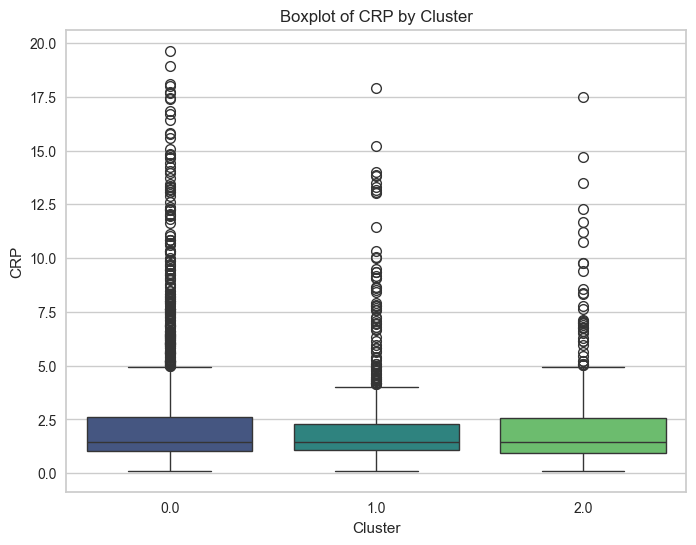

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


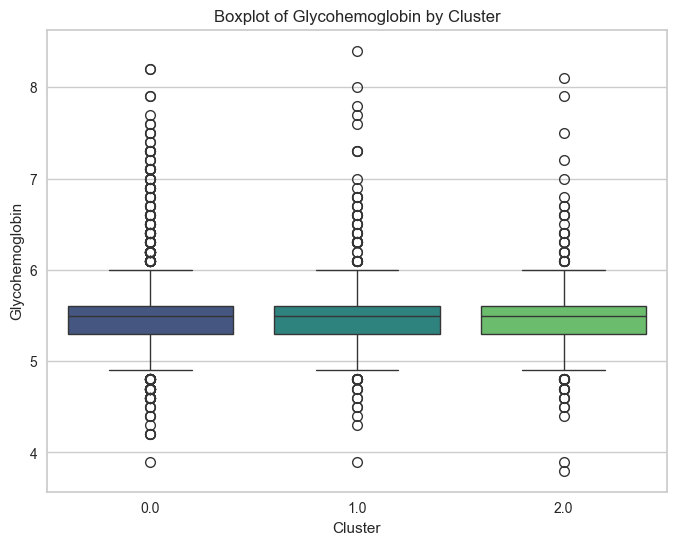

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


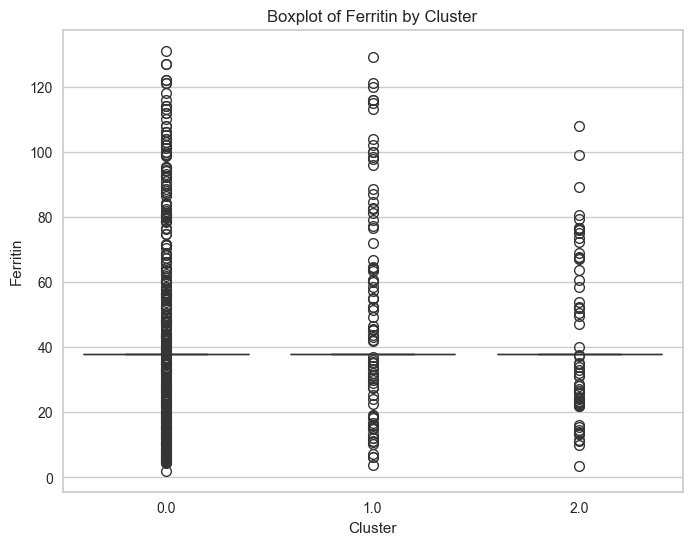

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


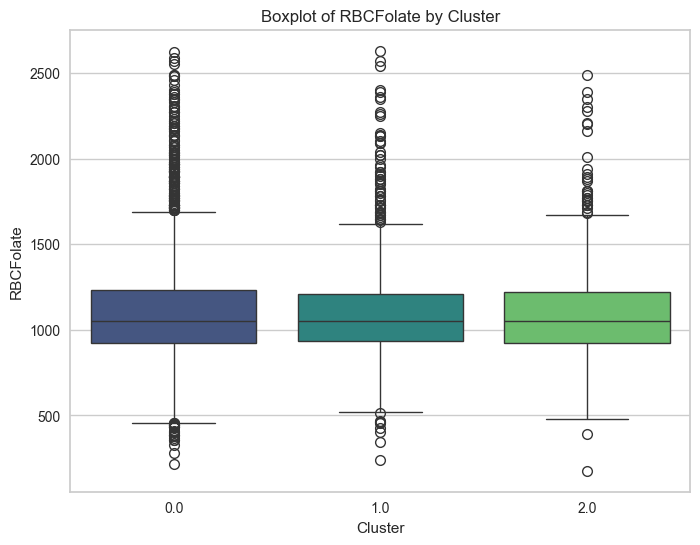

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


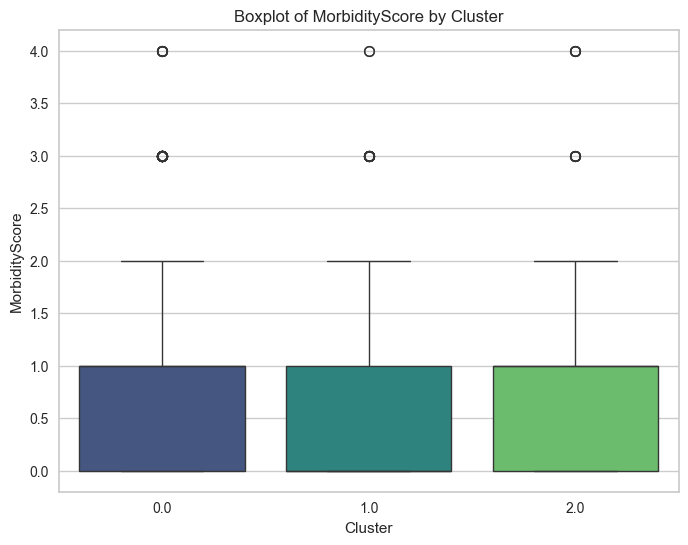

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


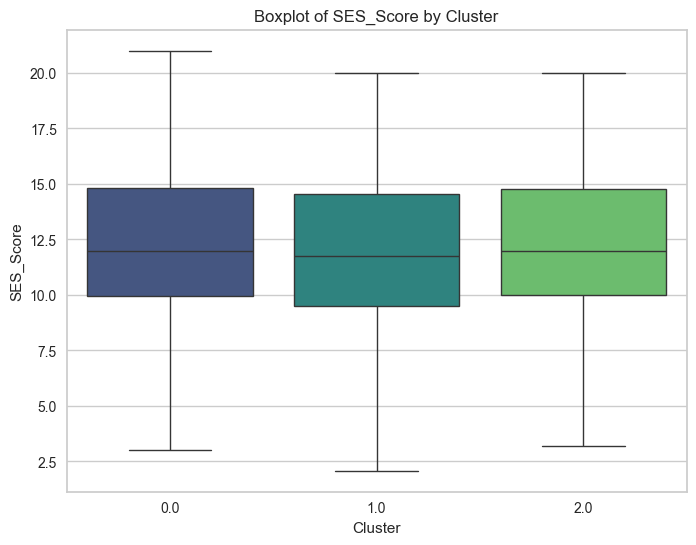

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8300\1894620556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")


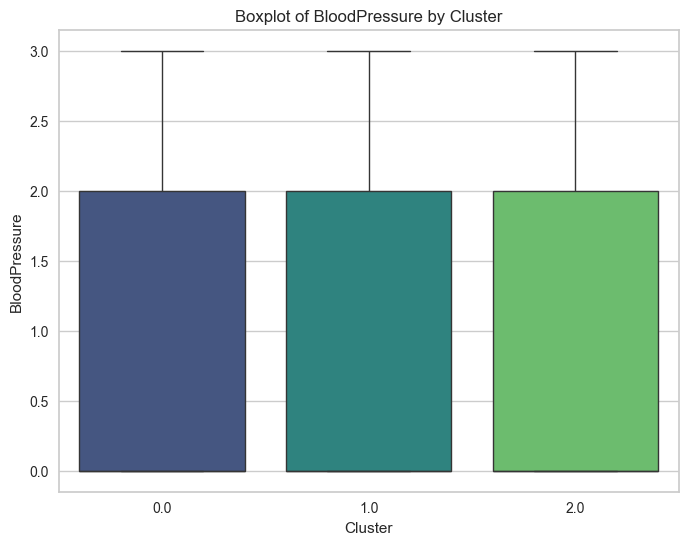

In [ ]:
for col in agglo_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=agglo_pca["Cluster"], y=agglo_df[col], palette="viridis")
    plt.title(f"Boxplot of {col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.show()
